In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from google.colab import drive
import os

In [357]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [358]:
# Define file paths (replace with the correct paths to your files)
contributions_path = '/content/drive/My Drive/Campaigns_and_Elections/Iowa_Campaign_Contributions_Received_20241016.csv'
expenditures_path = '/content/drive/My Drive/Campaigns_and_Elections/Iowa_Campaign_Expenditures_20241016.csv'
candidates_path = '/content/drive/My Drive/Campaigns_and_Elections/Registered_Political_Candidates__Committees_and_Entities_in_Iowa_20241016.csv'
pacs_path = '/content/drive/My Drive/Campaigns_and_Elections/Other_State_Federal_Political_Action_Committees_Filing_in_Iowa_20241016.csv'
independent_expenditures_path = '/content/drive/My Drive/Campaigns_and_Elections/Independent_Expenditures_For_or_Against_State_Candidates_or_Ballot_Issues_in_Iowa_20241016.csv'


In [359]:
# Load datasets into pandas DataFrames
contributions = pd.read_csv(contributions_path)
expenditures = pd.read_csv(expenditures_path)
candidates = pd.read_csv(candidates_path)
pacs = pd.read_csv(pacs_path)
independent_expenditures = pd.read_csv(independent_expenditures_path)

<ipython-input-359-d623bd9db43d>:2: DtypeWarning: Columns (1,2,5,10,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  contributions = pd.read_csv(contributions_path)
<ipython-input-359-d623bd9db43d>:3: DtypeWarning: Columns (2,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  expenditures = pd.read_csv(expenditures_path)


In [360]:
contributions.head()

,Date,Committee Code,Committee Type,Committee Name,Transaction Type,Contributing Committee Code,Contributing Organization,First Name,Last Name,Address - Line 1,Address - Line 2,City,State,Zip Code,Contribution Amount,Check Number
0,12/18/2007,1700,State House,Johnson for Iowa House,CON,NaN,NaN,Al & Lori,Hill,15768 - 300th Street,NaN,Radcliffe,IA,50230,500.00,5012
1,12/31/2003,6082,Iowa PAC,MidAmerican Energy Company PAC,CON,NaN,NaN,Daniel,Hegarty,1405 W 6th St,NaN,Storm Lake,IA,50588,24.48,NaN
2,06/30/2007,6082,Iowa PAC,MidAmerican Energy Company PAC,CON,NaN,NaN,Daniel,Hegarty,1405 W 6th St,NaN,Storm Lake,IA,50588,55.20,NaN
3,12/31/2004,6082,Iowa PAC,MidAmerican Energy Company PAC,CON,NaN,NaN,Daniel,Hegarty,1405 W 6th St,NaN,Storm Lake,IA,50588,25.20,NaN
4,12/31/2006,6082,Iowa PAC,MidAmerican Energy Company PAC,CON,NaN,NaN,Daniel,Hegarty,1405 W 6th St,NaN,Storm Lake,IA,50588,26.76,NaN


In [361]:
expenditures.head()

,Date,Transaction Type,Committee Code,Committee Type,Committee Name,Receiving Committee Code,Receiving Organization Name,First Name,Last Name,Address - Line 1,Address - Line 2,City,State,Zip,Expenditure Amount,Check Number
0,2004-10-12,EXP,9103,County Central Committee,Jefferson County Democratic Central Committee,NaN,Metcalf for Supervisor,NaN,NaN,2642 Hawthorne,NaN,Fairfield,IA,52556,50.00,518.0
1,2004-09-09,EXP,9103,County Central Committee,Jefferson County Democratic Central Committee,NaN,Morning Star Studio,NaN,NaN,51 1/2 South Court St.,NaN,Fairfield,IA,52556,800.00,512.0
2,2004-12-06,EXP,9103,County Central Committee,Jefferson County Democratic Central Committee,NaN,Morning Star Studio,NaN,NaN,51 1/2 South Court St.,NaN,Fairfield,IA,52556,354.56,525.0
3,2004-09-18,EXP,9103,County Central Committee,Jefferson County Democratic Central Committee,NaN,Morning Star Studio,NaN,NaN,51 1/2 South Court St.,NaN,Fairfield,IA,52556,119.79,513.0
4,2015-03-24,EXP,9645,Iowa PAC,Linn Phoenix Club,NaN,Postmaster,NaN,NaN,Main Post Office,NaN,Cedar Rapids,IA,52401,3.67,28291.0


In [362]:
candidates.head()

,Committee Name,Committee Type,Committee Number,District,Party,Election Year,Election Date,Office Sought,County,Candidate Name,...,Treasurer City State Zip,Treasurer Phone,Treasurer Email,Parent Entity,Parent Address,Parent City State Zip,Contact Name,Contact Address,Contact City State Zip,Contact Phone
0,Iowa Quarter Horse Racing PAC,Iowa PAC,9751,0.0,Not Available,2009.0,NaN,NaN,NaN,NaN,...,"St. Charles, IA, 50240",5.156817e+09,tmmulford@aol.com,Iowa Quarter Horse Racing,2309 Timber Ridge Ave,"St. Charles, IA, 50240",Jose Luis Rodriguez,5131 SE 26 Ct.,"Des Moines, IA, 50320",NaN
1,Plumbers and Pipe Fitters Local 125 Political ...,Iowa PAC,9672,0.0,Not Available,2012.0,NaN,NaN,NaN,NaN,...,"Center Point, IA, 52213",3.198491e+09,msadler@uanet.org,Plumbers and Pipefitters Local 125,1839 16th Ave SW,"Cedar Rapids, IA, 52404",COLE KILBURG,910 W SCOTT ST,"ELDRIDGE, IA, 52748",NaN
2,IOWA HARNESS HORSEMENS ASSOCIATION PAC,Iowa PAC,9737,0.0,Independent,2014.0,NaN,NaN,NaN,NaN,...,"BEDFORD, IA, 50833",7.126213e+09,jimreese51@icloud.com,IOWA HARNESS HORSEMENS ASSOCIATION,808 4TH AVE PO BOX 107,"GRINNELL, IA, 50112",Rachael Zimmerman,17664 Addison Avenue,"Elma, IA, 50628",NaN
3,Garrett for Statehouse Committee,State House,1654,11.0,Republican,2022.0,2022-11-08,Senator,NaN,Julian Garrett,...,"Indianola, IA, 50125",5.156695e+09,garrettforstatehouse@gmail.com,NaN,NaN,NaN,Nancy Garrett,19978-115th Ave.,"Indianola, IA, 50125",NaN
4,Grinnell Mutual Reinsurance Company PAC,Iowa PAC,9687,0.0,Not Available,0.0,NaN,NaN,NaN,NaN,...,"Grinnell, IA, 50112",8.003622e+09,Dana.Chittick@grinnellmutual.com,Grinnell Mutual Reinsurance Company,4215 Highway 146,"Grinnell, IA, 50112",Ryan O'Roake,616 E 26th Street,"Newton, IA, 50208",NaN


In [363]:
pacs.head()

,Committee Name,Committee Type,Committee Number,Party,Resident Agent Name,Agent Address,Agent City State Zip,Agent Phone,Agent Email,Contact Person,Contact Address,Contact City State Zip,Contact Phone,Contact Email,Parent Entity,Parent Address,Parent City State Zip
0,Progressive Majority,Out of State/Federal PAC or Candidate,8410,Not Available,Cecile Richards,2812 Northampton St.,"Washington, DC, 20015",2.022253e+09,NaN,Thomas Matzzic,"1601 Argonne PL, NW Apt 534","Washington , DC, 20015",2.026374e+09,NaN,NaN,NaN,NaN
1,"Affiliated Computer Services, Inc Good Goverme...",Out of State/Federal PAC or Candidate,8492,Not Available,Corporation Service Company,729 Insurance Exchange Blvd,"Des Moines, IA, 50309",8.009280e+09,NaN,John Coleman,"ACS Services 1800 M Street, NW Ste 800","Washington, DC, 20036",2.023783e+09,john.a.coleman@acs-inc.com,"Affiliated Computer Services, Inc",2828 N Haskell Ave,"Dallas, TX, 75204"
2,"Sallie Mae, Inc PAC",Out of State/Federal PAC or Candidate,8399,Not Available,Rose DiNapoli,11600 Sallie Mae Drive,"Reston, VA, 20193",7.038103e+09,NaN,Charlie Colligan,11600 Sallie Mae Drive,"Reston, VA, 20193",7.038103e+09,NaN,"Sallie Mae, Inc.",11600 Sallie Mae Drive,"Reston, VA, 20193"
3,Gumbo PAC,Out of State/Federal PAC or Candidate,8459,Not Available,Leslie Kerman,"6849 Old Dominion Drive, Ste 222","McLean, VA, 22101",5.716340e+09,NaN,Marilyn Monroe,"4837 86th St, Apt #A","Urbandale, IA, 50322",5.152702e+09,NaN,NaN,NaN,NaN
4,Congressional Majority Committee,Out of State/Federal PAC or Candidate,8481,Not Available,Bruceann Phillips,PO Box 7701,"Urbandale, IA, 50323",5.152821e+09,NaN,Robin Lake-Foster,Congressional Majority Committee PO Box 746,"Bakerfield, CA, 93302",8.885923e+09,NaN,NaN,NaN,NaN


In [364]:
independent_expenditures.head()

,Organization Name,Organization City,Organization State,Organization Zip,Organization Email,Contact First Name,Contact Last Name,Contact Email,Date of Expenditure,Amount,...,Communication Description,Communication Type,Corporation,Vendor,Distribution Date,For Candidate,Against Candidate,For Ballot Issue,Against Ballot Issue,Signed Date
0,Students for Life Action,Fredericksburg,VA,22401,compliance@studentsforlife.org,Dustin,Curtis,NaN,2022-06-06,148.50,...,NaN,Calls and text messages,NaN,"Acton Advocacy Group, LLC",2022-06-06,#2511 - Bradley for Iowa House,NaN,NaN,NaN,2022-06-08
1,National Organization for Marriage,Washington,DC,20006,contact@nationformarriage.org,Brian,Brown,contact@nationformarriage.org,2012-09-26,100000.00,...,NaN,Television,True,Mission Public Affairs,2012-10-03,NaN,NaN,NaN,NaN,NaN
2,AMERICANS FOR PROSPERITY,ARLINGTON,VA,22201,RJENTGENS@STANDTOGETHER.ORG,ROB,JENTGENS,NaN,2022-11-01,1343.70,...,NaN,CANVASSING,NaN,"AMERICANS FOR PROSPERITY, TALENTWAVE",2022-11-01,#2701 - Gehlbach for Iowa House,NaN,NaN,NaN,2022-11-03
3,Americans For Prosperity,Arlington,VA,22201,rjentgens@standtogether.org,Rob,Jentgens,NaN,2021-09-04,4411.25,...,NaN,Digital Ad,NaN,"People Who Think, In Pursuit Of",2021-09-04,Michael Bousselot,NaN,NaN,NaN,2021-09-06
4,Fair Courts for Us Committee,Des Moines,IA,50309,chc02@mchsi.com,Dan,Moore,DMoore@berensteinlawfirm.com,2010-10-19,110010.00,...,Radio ad regarding judicial retention. Bank f...,Radio ad and bank fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
# Fill missing values in the columns related to individual contributors with 'Unknown'
contributions.fillna({
    'Committee Type': 'Unknown',
    'Contributing Committee Code': 'Unknown',
    'Contributing Organization': 'Unknown',
    'First Name': 'Unknown',
    'Last Name': 'Unknown',
    'Address - Line 1': 'Unknown',
    'Address - Line 2': 'Unknown',
    'City': 'Unknown',
    'State': 'Unknown',
    'Zip Code': 'Unknown',
    'Check Number': 'Unknown'
}, inplace=True)

# Check the cleaned data summary
contributions.isnull().sum()


,0
Date,0
Committee Code,0
Committee Type,0
Committee Name,0
Transaction Type,0
Contributing Committee Code,0
Contributing Organization,0
First Name,0
Last Name,0
Address - Line 1,0


In [366]:
# Convert 'Date' column to datetime
contributions['Date'] = pd.to_datetime(contributions['Date'], errors='coerce')

# Convert 'Contribution Amount' to numeric (float)
contributions['Contribution Amount'] = pd.to_numeric(contributions['Contribution Amount'], errors='coerce')

# Confirm the data types have been correctly converted
contributions.dtypes


,0
Date,datetime64[ns]
Committee Code,object
Committee Type,object
Committee Name,object
Transaction Type,object
Contributing Committee Code,object
Contributing Organization,object
First Name,object
Last Name,object
Address - Line 1,object


In [367]:
# Convert 'Date' column to datetime format
expenditures['Date'] = pd.to_datetime(expenditures['Date'], errors='coerce')

# Fill missing values for text fields with 'Unknown'
expenditures.fillna({
    'Committee Type': 'Unknown',
    'Receiving Committee Code': 'Unknown',
    'Receiving Organization Name': 'Unknown',
    'First Name': 'Unknown',
    'Last Name': 'Unknown',
    'Address - Line 1': 'Unknown',
    'Address - Line 2': 'Unknown',
    'City': 'Unknown',
    'State': 'Unknown',
    'Zip': 'Unknown'
}, inplace=True)

# Check the cleaned data summary
print(expenditures.isnull().sum())
# Confirm the cleaning
expenditures.info()

Date                                0
Transaction Type                    0
Committee Code                      0
Committee Type                      0
Committee Name                      0
Receiving Committee Code            0
Receiving Organization Name         0
First Name                          0
Last Name                           0
Address - Line 1                    0
Address - Line 2                    0
City                                0
State                               0
Zip                                 0
Expenditure Amount                  0
Check Number                   192882
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582663 entries, 0 to 582662
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         582663 non-null  datetime64[ns]
 1   Transaction Type             582663 non-null  object        
 2  

In [368]:
# Convert 'Election Date' to datetime format
candidates['Election Date'] = pd.to_datetime(candidates['Election Date'], errors='coerce')

# Fill missing values for text-based columns with 'Unknown'
candidates.fillna({
    'Office Sought': 'Unknown',
    'County': 'Unknown',
    'Candidate Name': 'Unknown',
    'Candidate Address': 'Unknown',
    'Candidate City State Zip': 'Unknown',
    'Candidate Phone': 'Unknown',
    'Candidate Email': 'Unknown',
    'Chair Name': 'Unknown',
    'Chair Address': 'Unknown',
    'Chair City State Zip': 'Unknown',
    'Chair Phone': 'Unknown',
    'Chair Email': 'Unknown',
    'Treasurer Phone': 'Unknown',
    'Treasurer Email': 'Unknown',
    'Parent Entity': 'Unknown',
    'Parent Address': 'Unknown',
    'Parent City State Zip': 'Unknown',
    'Contact Name': 'Unknown',
    'Contact Address': 'Unknown',
    'Contact City State Zip': 'Unknown',
    'Contact Phone': 'Unknown'
}, inplace=True)

# Convert numeric fields to appropriate types
candidates['District'] = pd.to_numeric(candidates['District'], errors='coerce')
candidates['Election Year'] = pd.to_numeric(candidates['Election Year'], errors='coerce').astype('Int64')
candidates['Candidate Phone'] = pd.to_numeric(candidates['Candidate Phone'], errors='coerce').fillna(0).astype('int64')
candidates['Chair Phone'] = pd.to_numeric(candidates['Chair Phone'], errors='coerce').fillna(0).astype('int64')
candidates['Treasurer Phone'] = pd.to_numeric(candidates['Treasurer Phone'], errors='coerce').fillna(0).astype('int64')
candidates['Contact Phone'] = pd.to_numeric(candidates['Contact Phone'], errors='coerce').fillna(0).astype('int64')

print(candidates.isnull().sum())
# Confirm the cleaning
candidates.info()

Committee Name                0
Committee Type                0
Committee Number              0
District                    308
Party                         0
Election Year                42
Election Date               443
Office Sought                 0
County                        0
Candidate Name                0
Candidate Address             0
Candidate City State Zip      0
Candidate Phone               0
Candidate Email               0
Chair Name                    0
Chair Address                 0
Chair City State Zip          0
Chair Phone                   0
Chair Email                   0
Treasurer Name                0
Treasurer Address             0
Treasurer City State Zip      0
Treasurer Phone               0
Treasurer Email               0
Parent Entity                 0
Parent Address                0
Parent City State Zip         0
Contact Name                  0
Contact Address               0
Contact City State Zip        0
Contact Phone                 0
dtype: i

In [369]:
# Fill missing values for text-based columns with 'Unknown'
pacs.fillna({
    'Resident Agent Name': 'Unknown',
    'Agent Address': 'Unknown',
    'Agent City State Zip': 'Unknown',
    'Agent Phone': 'Unknown',
    'Agent Email': 'Unknown',
    'Contact Phone': 'Unknown',
    'Contact Email': 'Unknown',
    'Parent Entity': 'Unknown',
    'Parent Address': 'Unknown',
    'Parent City State Zip': 'Unknown'
}, inplace=True)

# Convert 'Committee Number' to string (to handle possible non-numeric committee numbers)
pacs['Committee Number'] = pacs['Committee Number'].astype(str)

# Convert 'Agent Phone' and 'Contact Phone' in the pacs dataset to numeric, fill missing with 0, then convert to string
pacs['Agent Phone'] = pd.to_numeric(pacs['Agent Phone'], errors='coerce').fillna(0).astype('int64')
pacs['Contact Phone'] = pd.to_numeric(pacs['Contact Phone'], errors='coerce').fillna(0).astype('int64')

# Confirm the cleaning
print(pacs.isnull().sum())
pacs.info()


Committee Name            0
Committee Type            0
Committee Number          0
Party                     0
Resident Agent Name       0
Agent Address             0
Agent City State Zip      0
Agent Phone               0
Agent Email               0
Contact Person            0
Contact Address           0
Contact City State Zip    0
Contact Phone             0
Contact Email             0
Parent Entity             0
Parent Address            0
Parent City State Zip     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Committee Name          508 non-null    object
 1   Committee Type          508 non-null    object
 2   Committee Number        508 non-null    object
 3   Party                   508 non-null    object
 4   Resident Agent Name     508 non-null    object
 5   Agent Address           508 non-null 

In [370]:
# Convert 'Date of Expenditure' and 'Distribution Date' to datetime format
independent_expenditures['Date of Expenditure'] = pd.to_datetime(independent_expenditures['Date of Expenditure'], errors='coerce')
independent_expenditures['Distribution Date'] = pd.to_datetime(independent_expenditures['Distribution Date'], errors='coerce')
independent_expenditures['Signed Date'] = pd.to_datetime(independent_expenditures['Signed Date'], errors='coerce')
# Fill missing values for text-based fields with 'Unknown'
independent_expenditures.fillna({
    'Contact Email': 'Unknown',
    'Position': 'Unknown',
    'Communication Description': 'Unknown',
    'Corporation': 'Unknown',
    'Vendor': 'Unknown',
    'For Candidate': 'Unknown',
    'Against Candidate': 'Unknown',
    'For Ballot Issue': 'Unknown',
    'Against Ballot Issue': 'Unknown'
}, inplace=True)


# Confirm the cleaning
print(independent_expenditures.isnull().sum())
independent_expenditures.info()

Organization Name              0
Organization City              0
Organization State             0
Organization Zip               0
Organization Email             0
Contact First Name             0
Contact Last Name              0
Contact Email                  0
Date of Expenditure            0
Amount                         0
Position                       0
Communication Description      0
Communication Type             1
Corporation                    0
Vendor                         0
Distribution Date            136
For Candidate                  0
Against Candidate              0
For Ballot Issue               0
Against Ballot Issue           0
Signed Date                  294
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Organization Name          1415 non-null   object       

In [371]:
# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

cap_outliers(contributions, 'Contribution Amount')
cap_outliers(expenditures, 'Expenditure Amount')
cap_outliers(independent_expenditures, 'Amount')

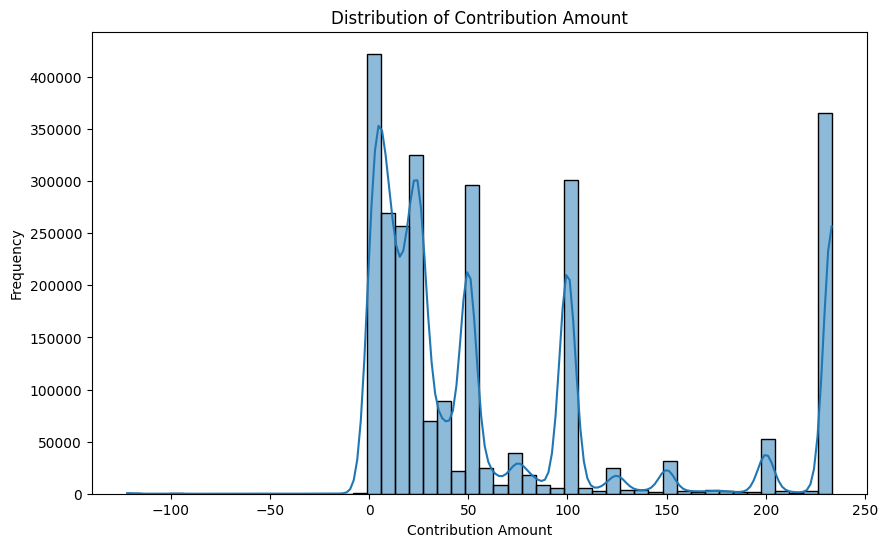

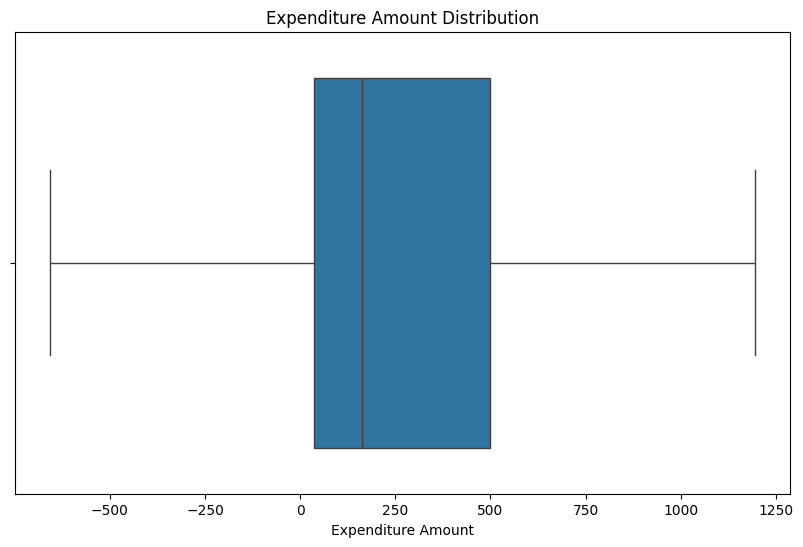

In [372]:
# Distribution of Contributions
plt.figure(figsize=(10, 6))
sns.histplot(contributions['Contribution Amount'], bins=50, kde=True)
plt.title('Distribution of Contribution Amount')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency')
plt.show()

# Spending patterns
plt.figure(figsize=(10, 6))
sns.boxplot(x=expenditures['Expenditure Amount'])
plt.title('Expenditure Amount Distribution')
plt.show()

In [373]:
# Contributions grouped by State
contributions_by_state = contributions.groupby('State')['Contribution Amount'].sum().nlargest(10)
print("Top 10 States by Total Contributions:")
print(contributions_by_state)

# Contributions grouped by City
contributions_by_city = contributions.groupby('City')['Contribution Amount'].sum().nlargest(10)
print("Top 10 Cities by Total Contributions:")
print(contributions_by_city)

Top 10 States by Total Contributions:
State
IA         1.625915e+08
DC         3.139409e+06
IL         2.582262e+06
CA         1.742780e+06
MN         1.252101e+06
Unknown    1.171934e+06
NE         1.152047e+06
NY         1.038197e+06
WI         7.987842e+05
VA         7.311945e+05
Name: Contribution Amount, dtype: float64
Top 10 Cities by Total Contributions:
City
Des Moines         2.527533e+07
West Des Moines    1.077338e+07
Cedar Rapids       7.483000e+06
Iowa City          4.568579e+06
Ankeny             3.702114e+06
Washington         3.452023e+06
Urbandale          3.448823e+06
Ames               3.396779e+06
Davenport          2.913423e+06
Dubuque            2.847733e+06
Name: Contribution Amount, dtype: float64


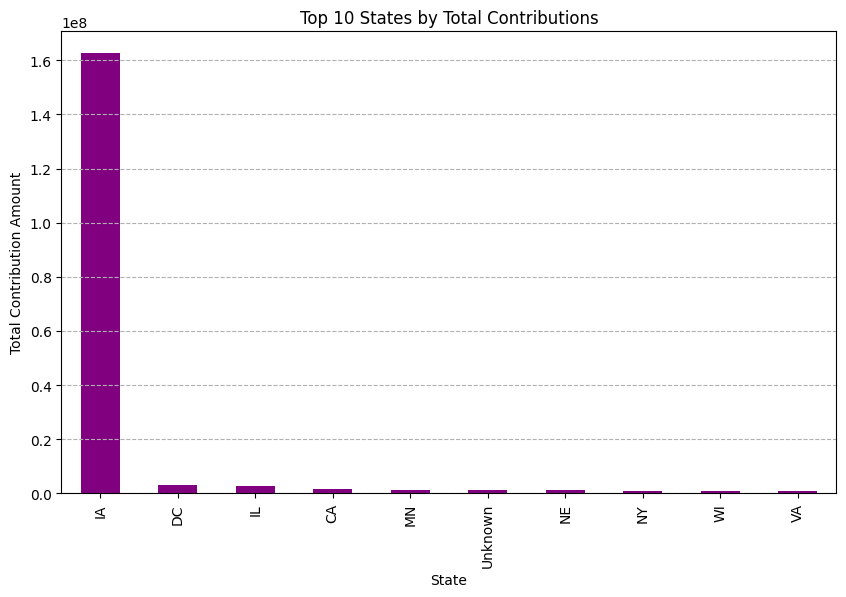

In [374]:
# Visualization for States
plt.figure(figsize=(10, 6))
contributions_by_state.plot(kind='bar', color='purple')
plt.title('Top 10 States by Total Contributions')
plt.xlabel('State')
plt.ylabel('Total Contribution Amount')
plt.grid(axis='y', linestyle='--')
plt.show()

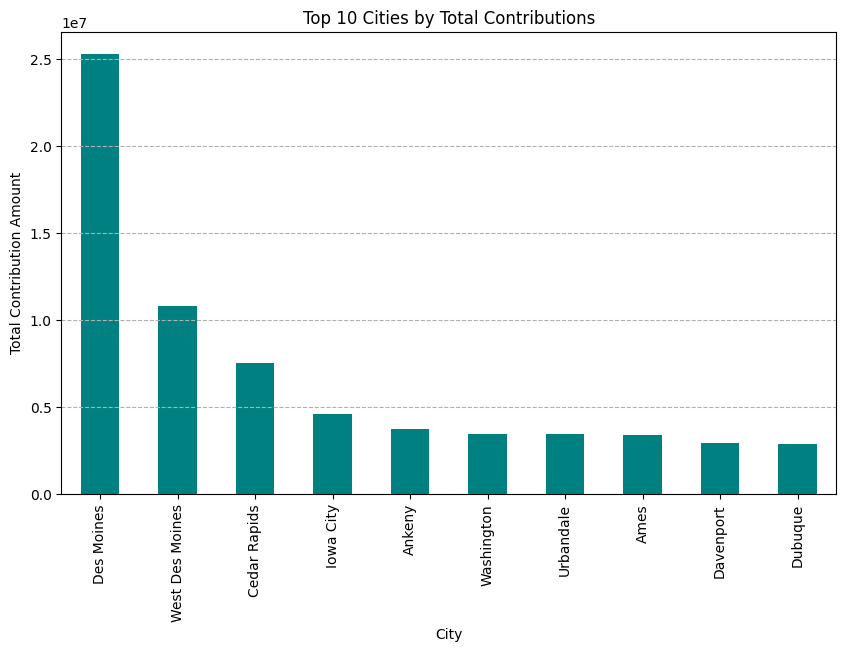

In [375]:
# Visualization for Cities
plt.figure(figsize=(10, 6))
contributions_by_city.plot(kind='bar', color='teal')
plt.title('Top 10 Cities by Total Contributions')
plt.xlabel('City')
plt.ylabel('Total Contribution Amount')
plt.grid(axis='y', linestyle='--')
plt.show()

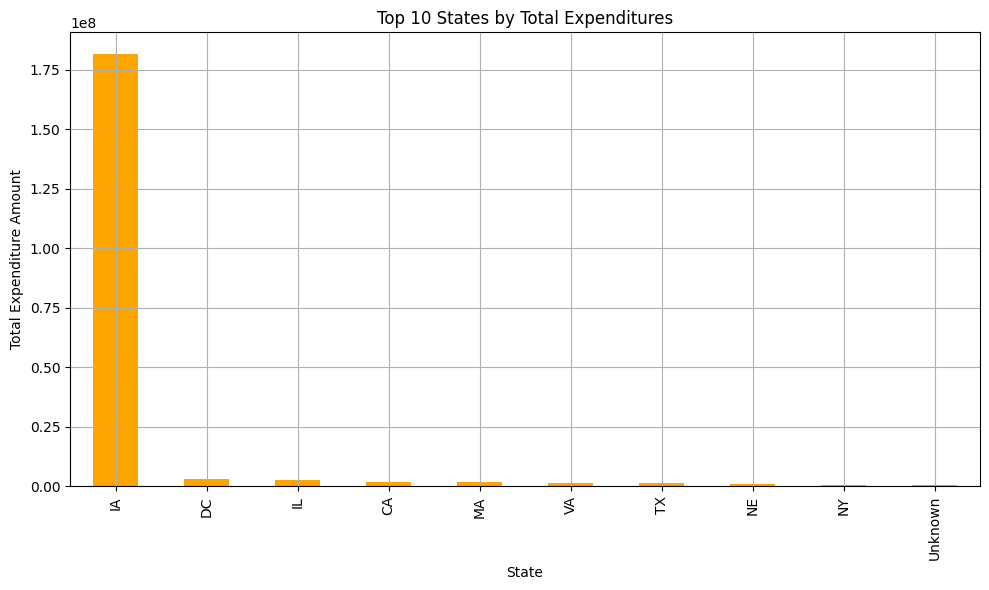

In [376]:
# Expenditures by State
expenditures_by_state = expenditures.groupby('State')['Expenditure Amount'].sum().nlargest(10)

# Plot top 10 states by total expenditures
plt.figure(figsize=(10, 6))
expenditures_by_state.plot(kind='bar', color='orange')
plt.title('Top 10 States by Total Expenditures')
plt.xlabel('State')
plt.ylabel('Total Expenditure Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


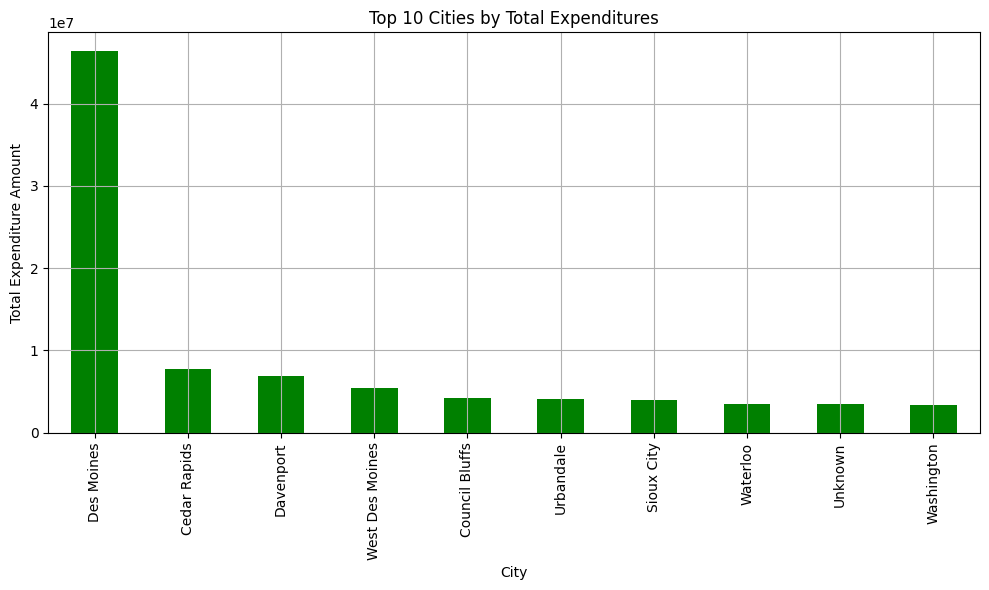

In [377]:
# Expenditures by City
expenditures_by_city = expenditures.groupby('City')['Expenditure Amount'].sum().nlargest(10)

# Plot top 10 cities by total expenditures
plt.figure(figsize=(10, 6))
expenditures_by_city.plot(kind='bar', color='green')
plt.title('Top 10 Cities by Total Expenditures')
plt.xlabel('City')
plt.ylabel('Total Expenditure Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


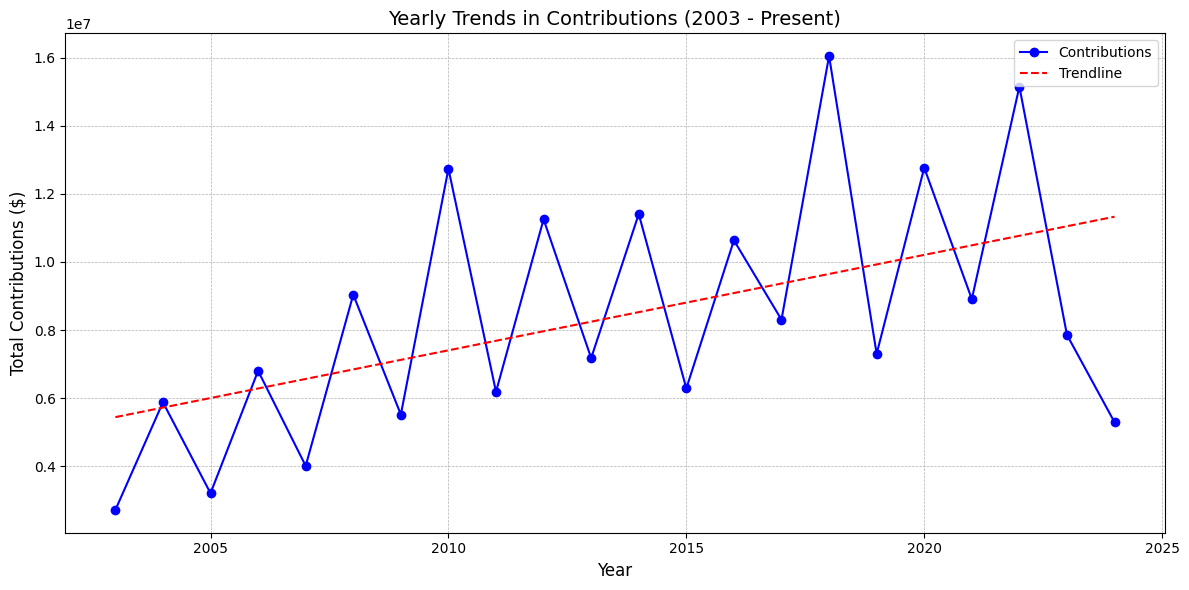

In [378]:
# Filter data from 2003 onward
contributions_filtered = contributions[contributions['Date'].dt.year >= 2003]

# Group contributions by year
yearly_contributions = contributions_filtered.groupby(contributions_filtered['Date'].dt.year)['Contribution Amount'].sum()

# Plot contributions over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_contributions.index, yearly_contributions.values, marker='o', linestyle='-', color='b',label='Contributions')
plt.title('Yearly Trends in Contributions (2003 - Present)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Contributions ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Optional: Add a trendline
z = np.polyfit(yearly_contributions.index, yearly_contributions.values, 1)
p = np.poly1d(z)
plt.plot(yearly_contributions.index, p(yearly_contributions.index), linestyle='--', color='red', label='Trendline')

plt.legend()
plt.show()

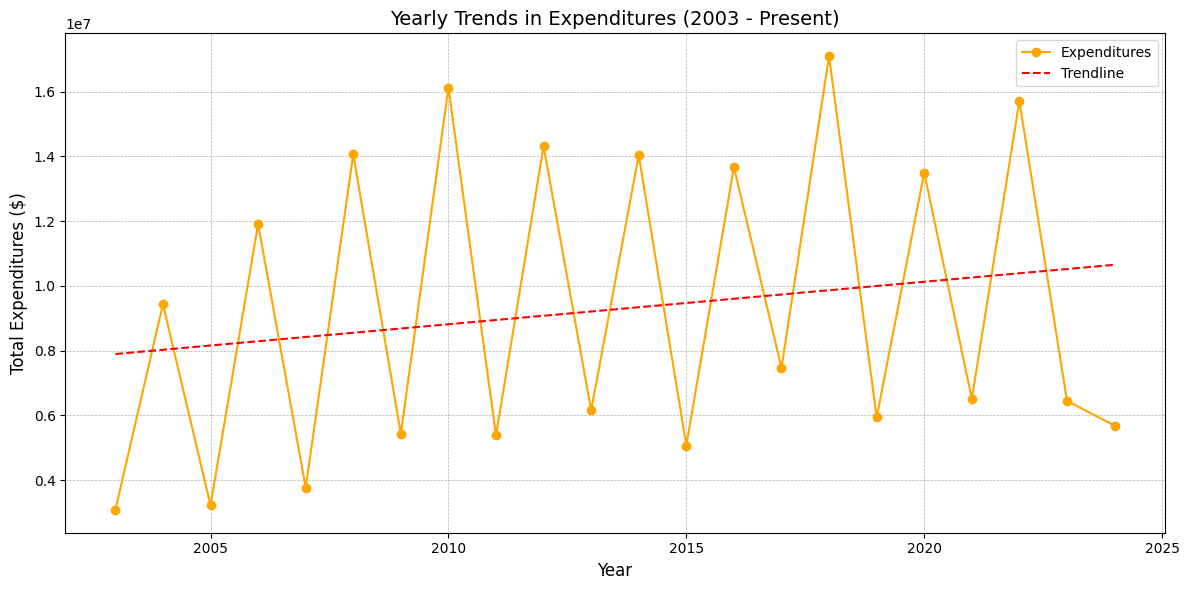

In [379]:
# Filter data from 2003 onward
expenditures_filtered = expenditures[expenditures['Date'].dt.year >= 2003]

# Group expenditures by year
yearly_expenditures = expenditures_filtered.groupby(expenditures_filtered['Date'].dt.year)['Expenditure Amount'].sum()

# Plot expenditures over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_expenditures.index, yearly_expenditures.values, marker='o', linestyle='-', color='orange', label='Expenditures')
plt.title('Yearly Trends in Expenditures (2003 - Present)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Expenditures ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Optional: Add a trendline
z_exp = np.polyfit(yearly_expenditures.index, yearly_expenditures.values, 1)
p_exp = np.poly1d(z_exp)
plt.plot(yearly_expenditures.index, p_exp(yearly_expenditures.index), linestyle='--', color='red', label='Trendline')

plt.legend()
plt.show()


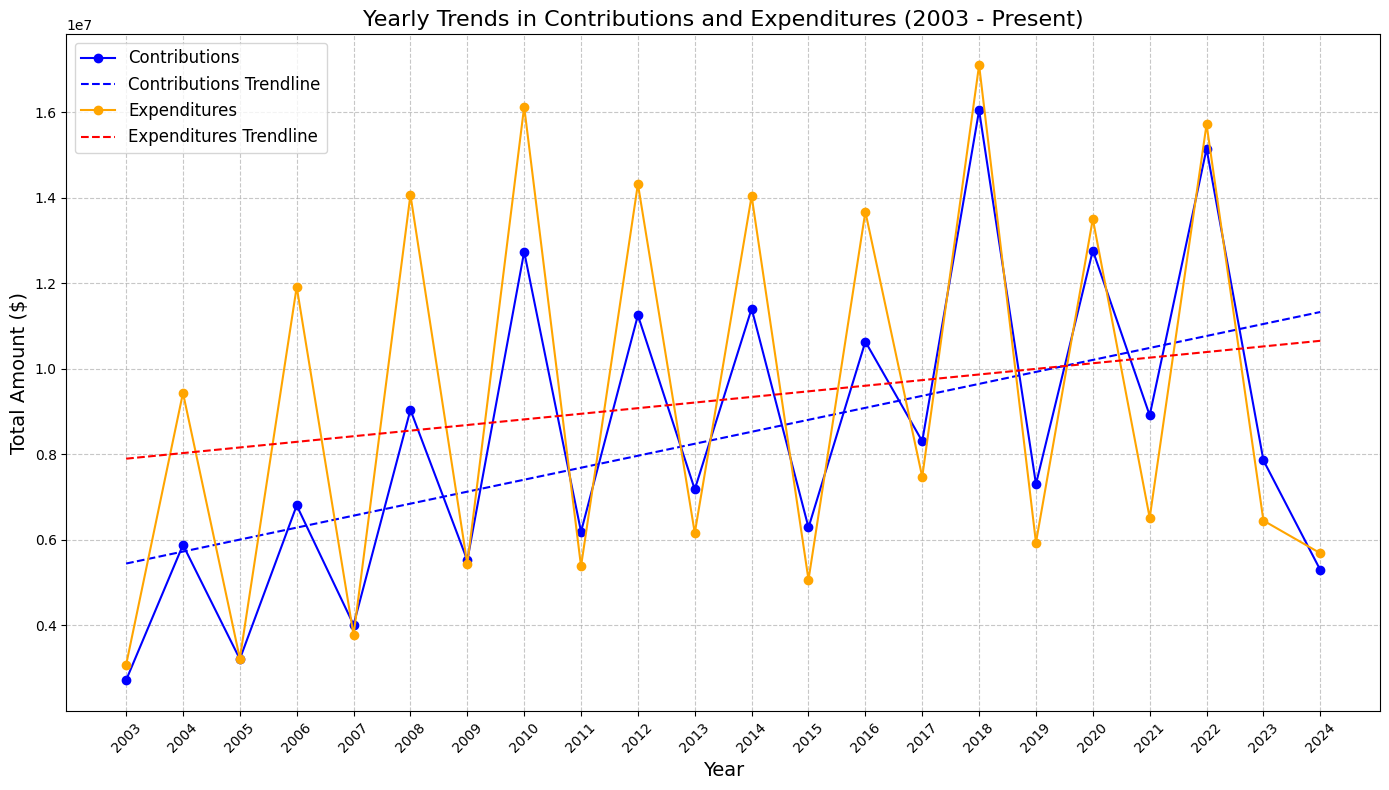

In [380]:
# Filter data from 2003 onward
expenditures_filtered = expenditures[expenditures['Date'].dt.year >= 2003]
contributions_filtered = contributions[contributions['Date'].dt.year >= 2003]

# Group expenditures and contributions by year
yearly_expenditures = expenditures_filtered.groupby(expenditures_filtered['Date'].dt.year)['Expenditure Amount'].sum()
yearly_contributions = contributions_filtered.groupby(contributions_filtered['Date'].dt.year)['Contribution Amount'].sum()

# Create a unified plot
plt.figure(figsize=(14, 8))

# Plot contributions
plt.plot(yearly_contributions.index, yearly_contributions.values, marker='o', linestyle='-', color='b', label='Contributions')
# Add a trendline for contributions
z_contrib = np.polyfit(yearly_contributions.index, yearly_contributions.values, 1)
p_contrib = np.poly1d(z_contrib)
plt.plot(yearly_contributions.index, p_contrib(yearly_contributions.index), linestyle='--', color='blue', label='Contributions Trendline')

# Plot expenditures
plt.plot(yearly_expenditures.index, yearly_expenditures.values, marker='o', linestyle='-', color='orange', label='Expenditures')
# Add a trendline for expenditures
z_exp = np.polyfit(yearly_expenditures.index, yearly_expenditures.values, 1)
p_exp = np.poly1d(z_exp)
plt.plot(yearly_expenditures.index, p_exp(yearly_expenditures.index), linestyle='--', color='red', label='Expenditures Trendline')

# Add titles and labels
plt.title('Yearly Trends in Contributions and Expenditures (2003 - Present)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Amount ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(yearly_contributions.index, rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Yearly Summary:
    Year  Contributions  Expenditures   Difference  Percentage Difference
0   2003   2.719590e+06    3078838.17   359247.765              11.668290
1   2004   5.882420e+06    9436798.04  3554378.490              37.665090
2   2005   3.212281e+06    3225418.50    13137.135               0.407300
3   2006   6.805257e+06   11915895.14  5110638.235              42.889251
4   2007   4.014476e+06    3771580.54  -242895.430              -6.440150
5   2008   9.040584e+06   14067833.26  5027249.545              35.735777
6   2009   5.521408e+06    5430192.99   -91215.385              -1.679782
7   2010   1.273660e+07   16129749.96  3393148.045              21.036582
8   2011   6.190363e+06    5382663.02  -807700.310             -15.005589
9   2012   1.125242e+07   14322583.52  3070163.395              21.435821
10  2013   7.179877e+06    6160424.00 -1019453.145             -16.548425
11  2014   1.140751e+07   14039836.07  2632329.490              18.749004
12  2015   6.289231e+0

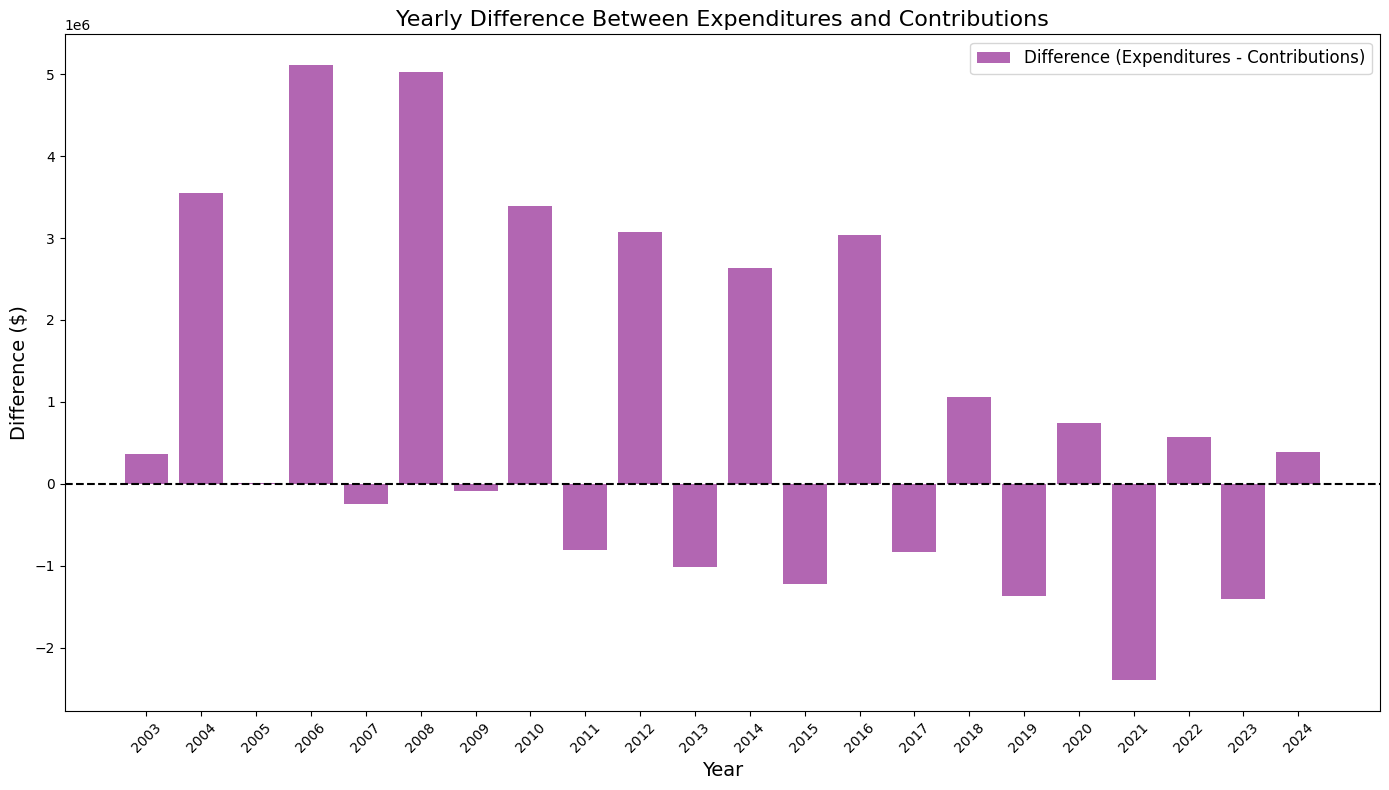

In [381]:
# Calculate yearly difference
yearly_data = pd.DataFrame({
    'Year': yearly_contributions.index,
    'Contributions': yearly_contributions.values,
    'Expenditures': yearly_expenditures.reindex(yearly_contributions.index, fill_value=0).values
})
yearly_data['Difference'] = yearly_data['Expenditures'] - yearly_data['Contributions']
yearly_data['Percentage Difference'] = (yearly_data['Difference'] / yearly_data['Expenditures']) * 100

# Print summary statistics
print("Yearly Summary:")
print(yearly_data)

# Visualization of yearly difference
plt.figure(figsize=(14, 8))
plt.bar(yearly_data['Year'], yearly_data['Difference'], color='purple', alpha=0.6, label='Difference (Expenditures - Contributions)')
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
plt.title('Yearly Difference Between Expenditures and Contributions', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Difference ($)', fontsize=14)
plt.xticks(yearly_data['Year'], rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

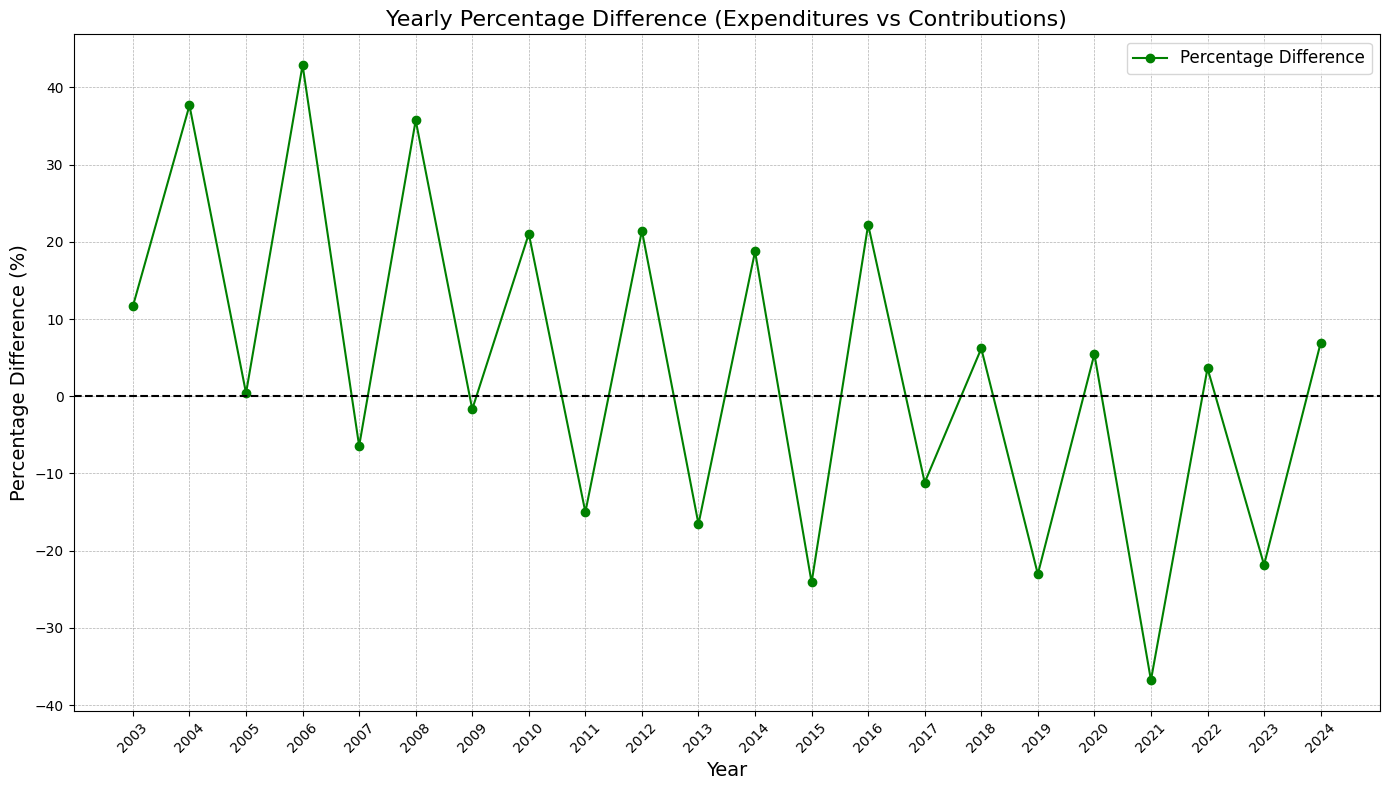

In [382]:
# Percentage difference visualization
plt.figure(figsize=(14, 8))
plt.plot(yearly_data['Year'], yearly_data['Percentage Difference'], marker='o', linestyle='-', color='green', label='Percentage Difference')
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
plt.title('Yearly Percentage Difference (Expenditures vs Contributions)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Difference (%)', fontsize=14)
plt.xticks(yearly_data['Year'], rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

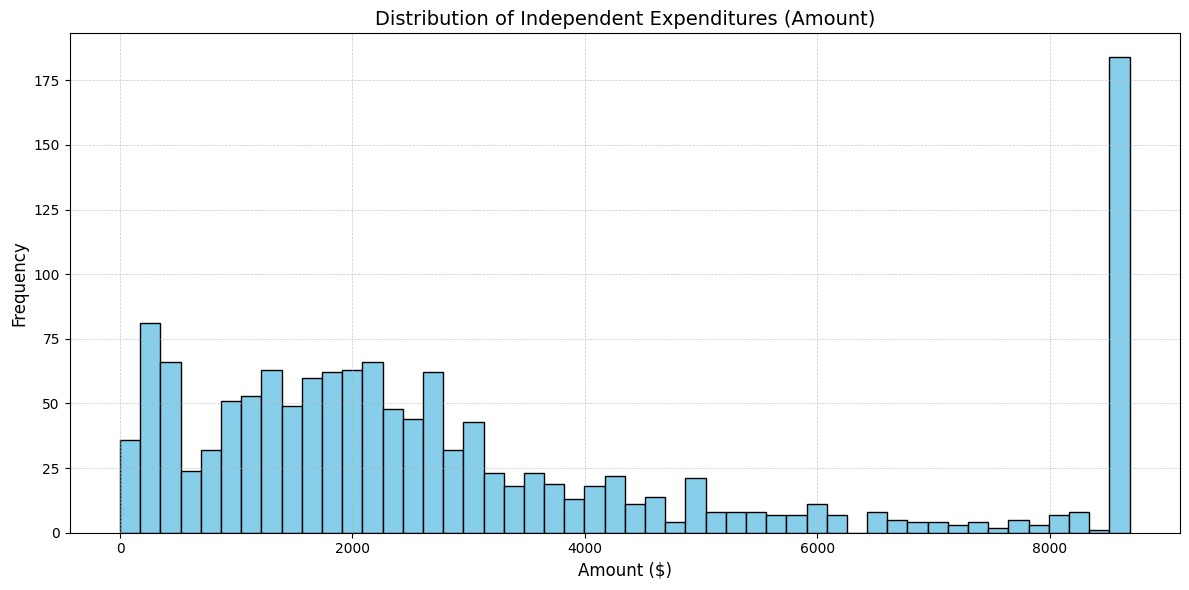

In [383]:
# Plotting histogram to analyze the distribution of 'Amount' in independent_expenditures

# Assuming `independent_expenditures` is the dataset being referred to
plt.figure(figsize=(12, 6))
plt.hist(independent_expenditures['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Independent Expenditures (Amount)', fontsize=14)
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [384]:
!pip install tabulate

In [385]:
# Aggregate data to find the total contributions and expenditures over time for each committee
total_contributions_by_committee = contributions.groupby('Committee Name').agg(
    Total_Contributions=('Contribution Amount', 'sum'),
    First_Date=('Date', 'min'),
    Last_Date=('Date', 'max'),
    Count=('Contribution Amount', 'count')
).reset_index()

total_expenditures_by_committee = expenditures.groupby('Committee Name').agg(
    Total_Expenditures=('Expenditure Amount', 'sum'),
    First_Date=('Date', 'min'),
    Last_Date=('Date', 'max'),
    Count=('Expenditure Amount', 'count')
).reset_index()

# Get top 10 committees by total contributions and expenditures
top_10_contributors = total_contributions_by_committee.nlargest(10, 'Total_Contributions')
top_10_expenders = total_expenditures_by_committee.nlargest(10, 'Total_Expenditures')

# Combine contributions and expenditures for the top 10 committees
top_committees_summary = pd.merge(
    top_10_contributors[['Committee Name', 'Total_Contributions']],
    top_10_expenders[['Committee Name', 'Total_Expenditures']],
    on='Committee Name',
    how='outer'
).fillna(0)


In [386]:
from tabulate import tabulate
print(tabulate(top_committees_summary, headers='keys', tablefmt='grid'))

+----+--------------------------------------------------------+-----------------------+----------------------+
|    | Committee Name                                         |   Total_Contributions |   Total_Expenditures |
+====+========================================================+=======================+======================+
|  0 | Associated General Contractors of Iowa PAC             |           0           |          2.33387e+06 |
+----+--------------------------------------------------------+-----------------------+----------------------+
|  1 | Bankers Unite in Legislative Decisions AKA: BUILD      |           2.45787e+06 |          1.87834e+06 |
+----+--------------------------------------------------------+-----------------------+----------------------+
|  2 | Credit Union PAC                                       |           2.418e+06   |          2.23422e+06 |
+----+--------------------------------------------------------+-----------------------+----------------------+
|

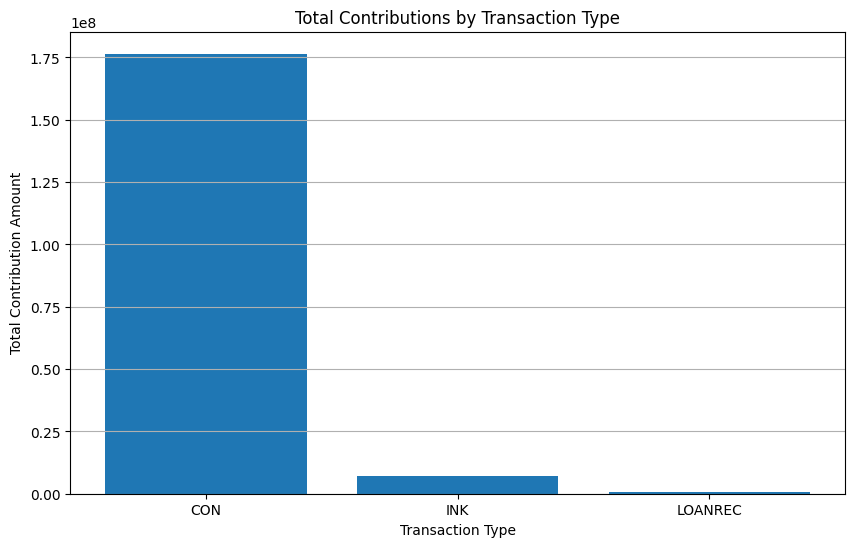

In [387]:
# Summarize contributions over time
contributions_summary = contributions.groupby('Transaction Type')['Contribution Amount'].sum().reset_index()

# Plot Contributions as a Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(contributions_summary['Transaction Type'], contributions_summary['Contribution Amount'])
plt.title("Total Contributions by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Total Contribution Amount")
plt.grid(axis='y')  # Add gridlines only on the y-axis for better readability
plt.show()


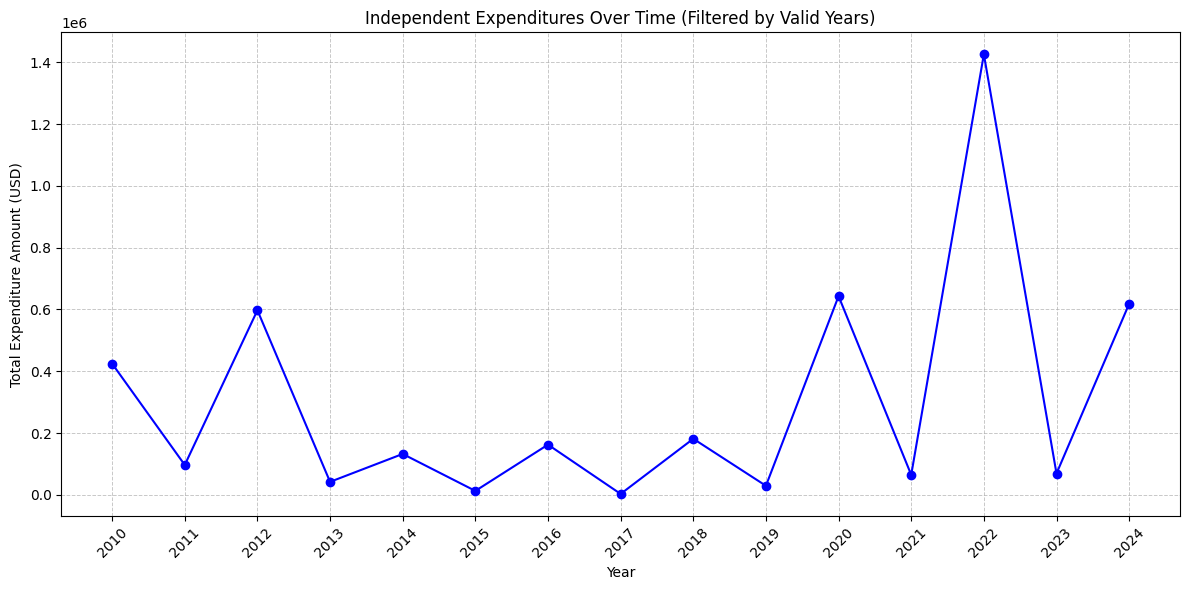

,Year,Amount
14,2024,6.183729e+05
13,2023,6.923749e+04
12,2022,1.425775e+06
11,2021,6.493199e+04
10,2020,6.431384e+05
9,2019,2.952852e+04
8,2018,1.816638e+05
7,2017,3.218650e+03
6,2016,1.626648e+05
5,2015,1.295241e+04


In [388]:
# Extract year from 'Date of Expenditure'
independent_expenditures['Year'] = independent_expenditures['Date of Expenditure'].dt.year

# Filter data for meaningful years (e.g., ignore null or unrealistic years)
independent_expenditures_filtered = independent_expenditures[
    independent_expenditures['Year'].notnull()
]

# Summarize independent expenditures by year
independent_summary = independent_expenditures_filtered.groupby('Year')['Amount'].sum().reset_index()

# Plot Independent Expenditures Over Time
plt.figure(figsize=(12, 6))
plt.plot(independent_summary['Year'], independent_summary['Amount'], marker='o', linestyle='-', color='b')
plt.title("Independent Expenditures Over Time (Filtered by Valid Years)")
plt.xlabel("Year")
plt.ylabel("Total Expenditure Amount (USD)")
plt.xticks(independent_summary['Year'], rotation=45)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary table
independent_summary.sort_values(by='Year', ascending=False)


In [389]:
# Grouping expenditures by type (if available)
spending_patterns = expenditures.groupby('Transaction Type')['Expenditure Amount'].sum().reset_index()
print("Spending Patterns:")
print(spending_patterns.sort_values(by='Expenditure Amount', ascending=False))


Spending Patterns:
  Transaction Type  Expenditure Amount
0              EXP        2.030596e+08
1          LOANREP        1.845480e+06


In [390]:
# Contributions by PACs
pac_contributions = pacs.groupby('Committee Name')['Agent Phone'].count().reset_index()
pac_contributions.rename(columns={'Agent Phone': 'Total Contributions'}, inplace=True)

# Identifying top PACs
top_pacs = pac_contributions.sort_values(by='Total Contributions', ascending=False).head(10)
print("Top PACs by Contributions:")
print(top_pacs)


Top PACs by Contributions:
                                        Committee Name  Total Contributions
0                               21st Century Democrats                    1
334         Oral & Maxillofacial Surgery PAC  (OMSPAC)                    1
347              Pepsico, Inc. Concerned Citizens Fund                    1
346        People for the American Way Voters Alliance                    1
345     People For the American Way (PFAW) Action Fund                    1
344                                  Patriot Voice PAC                    1
343                            Participation 2000 Inc.                    1
342                         PPG Better Government Team                    1
341                                           POET PAC                    1
340  PLUMBERS & PIPEFITTERS LOCAL 441 POLITICAL ACT...                    1


Contributions by Party:
           Party  Total Contributions
2  Not Available                  423
0     Democratic                   54
4     Republican                   21
3          Other                    9
1    Independent                    1


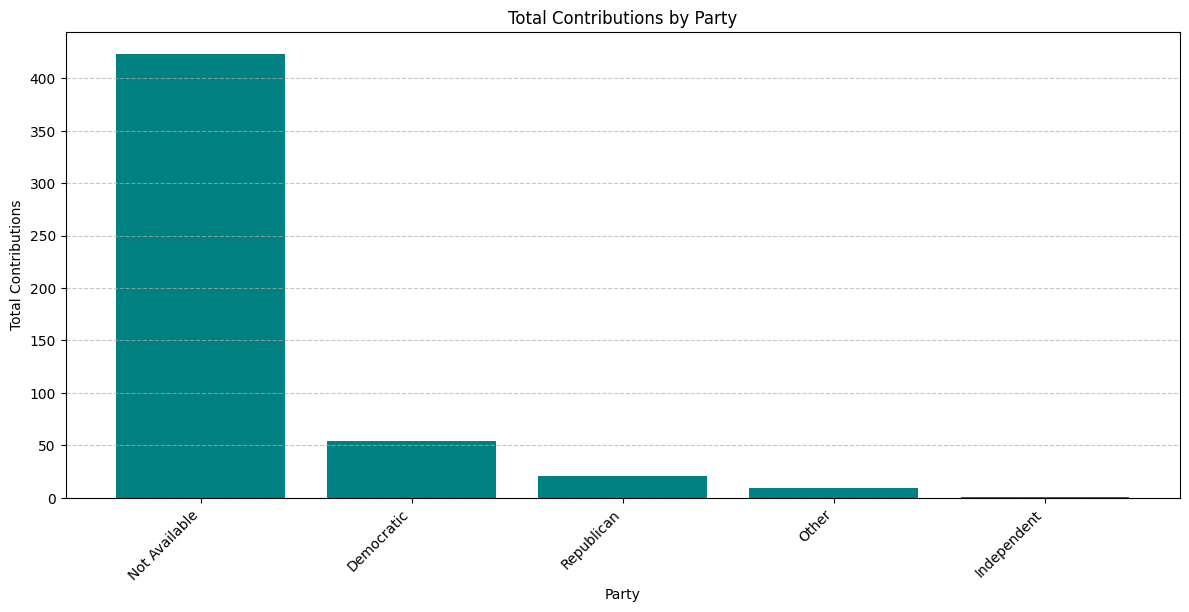

In [391]:
# Step 1: Count contributions grouped by PACs (Committee Name)
pac_contributions = pacs.groupby('Committee Name')['Agent Phone'].count().reset_index()
pac_contributions.rename(columns={'Agent Phone': 'Total Contributions'}, inplace=True)

# Step 2: Merge back Total Contributions into the original PACs DataFrame
pacs = pd.merge(pacs, pac_contributions, on='Committee Name', how='left')

# Step 3: Contributions grouped by Party
party_contributions = pacs.groupby('Party')['Total Contributions'].sum().reset_index()

# Step 4: Sort and display contributions by party
party_contributions = party_contributions.sort_values(by='Total Contributions', ascending=False)
print("Contributions by Party:")
print(party_contributions)

# Step 5: Visualize contributions by party
plt.figure(figsize=(12, 6))
plt.bar(party_contributions['Party'], party_contributions['Total Contributions'], color='teal')
plt.xlabel('Party')
plt.ylabel('Total Contributions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title('Total Contributions by Party')
plt.show()

In [392]:
# Check unique values in the 'Committee Type' column
unique_committee_types = pacs['Committee Type'].unique()

# Display unique committee types
print("Unique Committee Types:")
for committee_type in unique_committee_types:
    print(committee_type)


Unique Committee Types:
Out of State/Federal PAC or Candidate


In [393]:
# Grouping contributions by county
county_contributions = contributions.groupby('City')['Contribution Amount'].sum().reset_index()
print("Contributions by City:")
print(county_contributions.sort_values(by='Contribution Amount', ascending=False))


Contributions by City:
                   City  Contribution Amount
4589         Des Moines         2.527533e+07
18735   West Des Moines         1.077338e+07
3011       Cedar Rapids         7.483000e+06
8162          Iowa City         4.568579e+06
628              Ankeny         3.702114e+06
...                 ...                  ...
18625  Wellsesley Hills        -1.000000e+01
15605         San Jose'        -1.950000e+01
4103           DDubuque        -2.660000e+01
18654           Wesmont        -1.218750e+02
1643          Biringham        -1.218750e+02

[21321 rows x 2 columns]


In [394]:
# Identifying repeated donors by name and address
repeated_donors = contributions.groupby(['First Name', 'Last Name', 'Address - Line 1']).size().reset_index(name='Counts')
repeated_donors = repeated_donors[repeated_donors['Counts'] > 1]
print("Repeated Donors:")
print(repeated_donors)


Repeated Donors:
        First Name         Last Name    Address - Line 1  Counts
3          & Cindy    DeWall, Daniel    1617 Colonial Dr       6
4         & Daniel    Buck, Dorothea      420 E. 29th St       3
6            & KIm        North J.C.      2170 206th Pl.       3
12      & Patricia  Granstra, Donley   708 E. 2nd Street       4
17         & Traci  Mallaro, Michael  1007 Carriage Lane       5
...            ...               ...                 ...     ...
802849        zack            larsen        512 prospect       5
802852        zack            worcel     812 s stull ave       3
802855       zakia             KATOR  4129 Long Cove Cir       6
802857         zeb   beilke-mccallum      2821 sherry ln       2
802858        zero        Unitemized                none      70

[301732 rows x 4 columns]


In [395]:
# Grouping independent expenditures for ballot issues
ballot_expenditures = independent_expenditures.groupby(['For Ballot Issue', 'Against Ballot Issue'])['Amount'].sum().reset_index()
print("Independent Expenditures for Ballot Issues:")
print(ballot_expenditures)


Independent Expenditures for Ballot Issues:
                                    For Ballot Issue  \
0    #BALLOT50420 - Yes for Dubuque Schools Campaign   
1  #BALLOT50741 - Education Matters - Support Fai...   
2         Polk County Courthouse Ref Vote 46-3503308   
3                                            Unknown   
4                                            Unknown   
5                                            Unknown   
6                                            Unknown   
7                                            Unknown   
8                                   vote yes for EMS   

                           Against Ballot Issue        Amount  
0                                       Unknown  1.500000e+03  
1                                       Unknown  1.600000e+02  
2                                       Unknown  2.500000e+03  
3  #BALLOT50959 - Our Land Our Water Our Future  8.688263e+03  
4                  Gov't Internet in Fort Dodge  4.208820e+03  
5          

In [396]:
# Categorizing contributions as small or large
contributions['Donation Type'] = contributions['Contribution Amount'].apply(lambda x: 'Small' if x <= 25 else 'Large')

# Summarizing small vs large contributions
donation_summary = contributions.groupby('Donation Type')['Contribution Amount'].sum()
print("Small vs Large Contributions:")
print(donation_summary)


Small vs Large Contributions:
Donation Type
Large    1.684781e+08
Small    1.604478e+07
Name: Contribution Amount, dtype: float64


In [397]:
# Summarizing PAC spending
pac_spending = expenditures.groupby('Committee Name')['Expenditure Amount'].sum().reset_index()
print("PAC Spending Summary:")
print(pac_spending.sort_values(by='Expenditure Amount', ascending=False).head(10))


PAC Spending Summary:
                                         Committee Name  Expenditure Amount
3402                              Iowa Democratic Party         15581934.21
5444                           Republican Party of Iowa          3241635.44
260          Associated General Contractors of Iowa PAC          2333872.76
1904                                   Credit Union PAC          2234216.78
320   Bankers Unite in Legislative Decisions AKA: BUILD          1878343.74
4068                              Kim Reynolds for Iowa          1727790.56
5325    RPAC Iowa - REALTORS Political Action Committee          1720814.78
2970                        Governor Branstad Committee          1635501.44
3423                                    Iowa Health PAC          1586792.57
3303  Hy-Vee, Inc. Employees' Political Action Commi...          1425764.80


Spending by Category:
  Transaction Type  Expenditure Amount
0              EXP        2.030596e+08
1          LOANREP        1.845480e+06


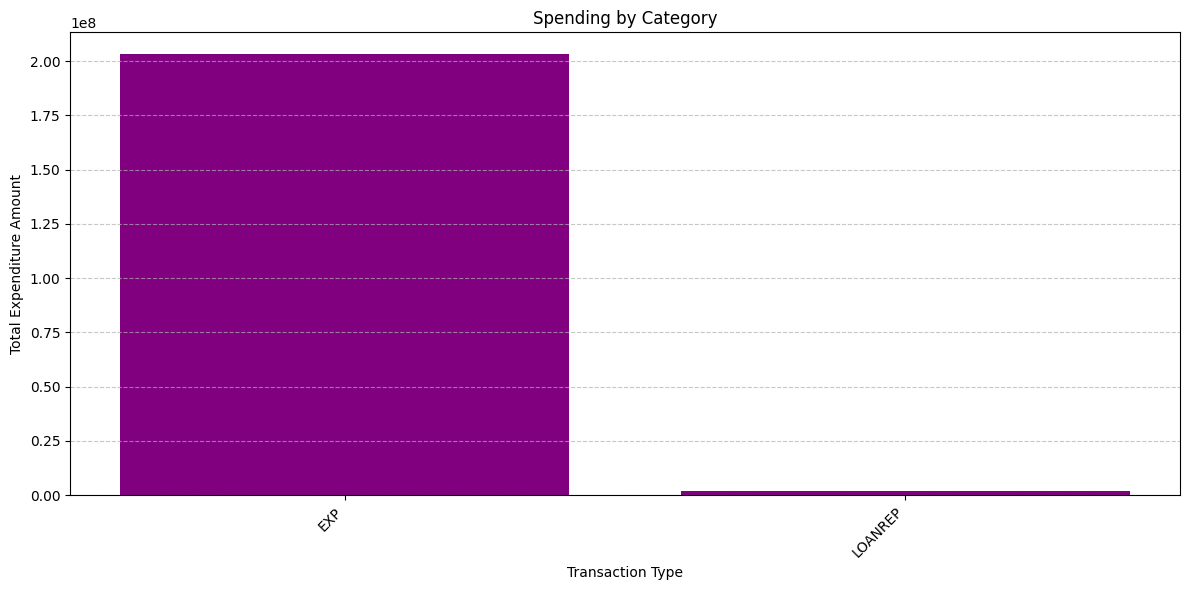

In [398]:
# Spending patterns by transaction type
spending_by_category = expenditures.groupby('Transaction Type')['Expenditure Amount'].sum().reset_index()

# Sort and display top spending categories
spending_by_category = spending_by_category.sort_values(by='Expenditure Amount', ascending=False)
print("Spending by Category:")
print(spending_by_category.head(10))

# Visualize spending by category
plt.figure(figsize=(12, 6))
plt.bar(spending_by_category['Transaction Type'], spending_by_category['Expenditure Amount'], color='purple')
plt.title('Spending by Category')
plt.xlabel('Transaction Type')
plt.ylabel('Total Expenditure Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Top 10 Committees by Net Contributions:
                                         Committee Name  Contribution Amount  \
3637                              Kim Reynolds for Iowa          4003800.225   
2646                        Governor Branstad Committee          3391976.790   
2922                               Hubbell for Governor          1864490.125   
4700    RPAC Iowa - REALTORS Political Action Committee          2817889.635   
2940  Hy-Vee, Inc. Employees' Political Action Commi...          2437382.700   
3017  Iowa Farm Bureau Federation Political Action C...          1880688.255   
1876                                    DeJear for Iowa          1550771.660   
894                               Citizens for Gronstal          1104045.795   
2823           Heavy Highway Political Action Committee          1696091.230   
5642                                  Upmeyer for House           824413.825   

      Expenditure Amount  Net Contributions  
3637          1727790.56        2

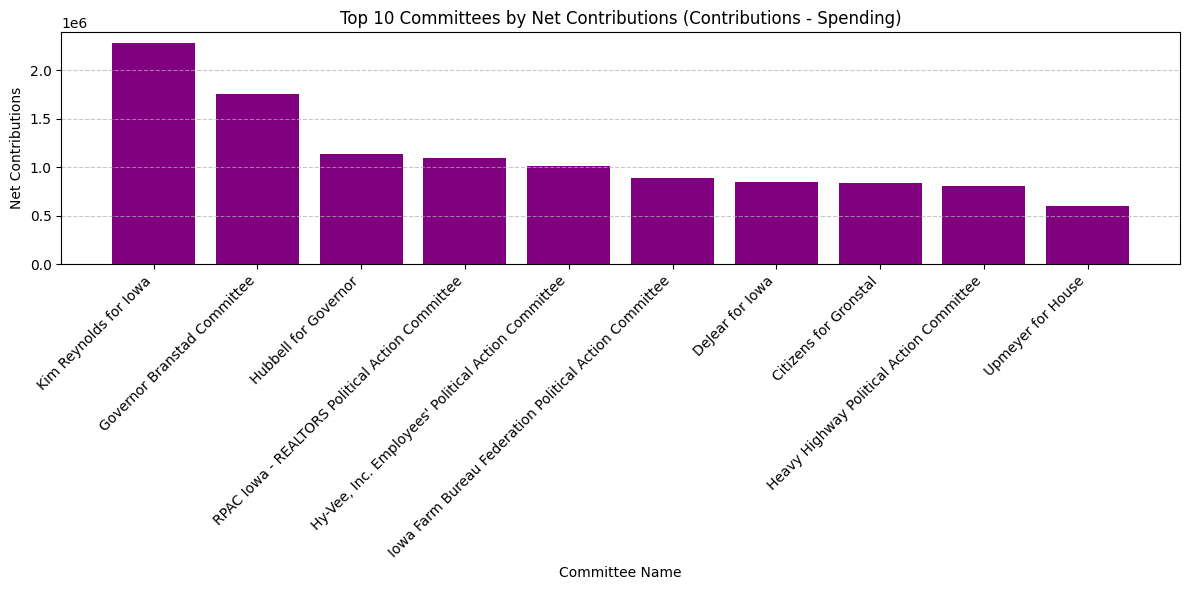

In [399]:
# Summarize contributions and expenditures
total_contributions_spending = pd.merge(
    contributions.groupby('Committee Name')['Contribution Amount'].sum().reset_index(),
    expenditures.groupby('Committee Name')['Expenditure Amount'].sum().reset_index(),
    on='Committee Name',
    how='inner'
)

# Calculate the difference (Net Contributions)
total_contributions_spending['Net Contributions'] = total_contributions_spending['Contribution Amount'] - total_contributions_spending['Expenditure Amount']

# Sort by Net Contributions and take the top 10 committees
top_10_net_contributions = total_contributions_spending.sort_values(by='Net Contributions', ascending=False).head(10)

print("Top 10 Committees by Net Contributions:")
print(top_10_net_contributions)

# Visualize contributions vs spending for the top 10 committees
plt.figure(figsize=(12, 6))
plt.bar(top_10_net_contributions['Committee Name'], top_10_net_contributions['Net Contributions'], color='purple')
plt.title('Top 10 Committees by Net Contributions (Contributions - Spending)')
plt.xlabel('Committee Name')
plt.ylabel('Net Contributions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Top 10 Committees by Contributions:
                                         Committee Name  Contribution Amount
3204                              Iowa Democratic Party          5438824.475
3870                              Kim Reynolds for Iowa          4003800.225
2822                        Governor Branstad Committee          3391976.790
5012    RPAC Iowa - REALTORS Political Action Committee          2817889.635
259   Bankers Unite in Legislative Decisions AKA: BUILD          2457874.345
3127  Hy-Vee, Inc. Employees' Political Action Commi...          2437382.700
1824                                   Credit Union PAC          2417996.230
3209  Iowa Farm Bureau Federation Political Action C...          1880688.255
3108                               Hubbell for Governor          1864490.125
5115                           Republican Party of Iowa          1766313.280


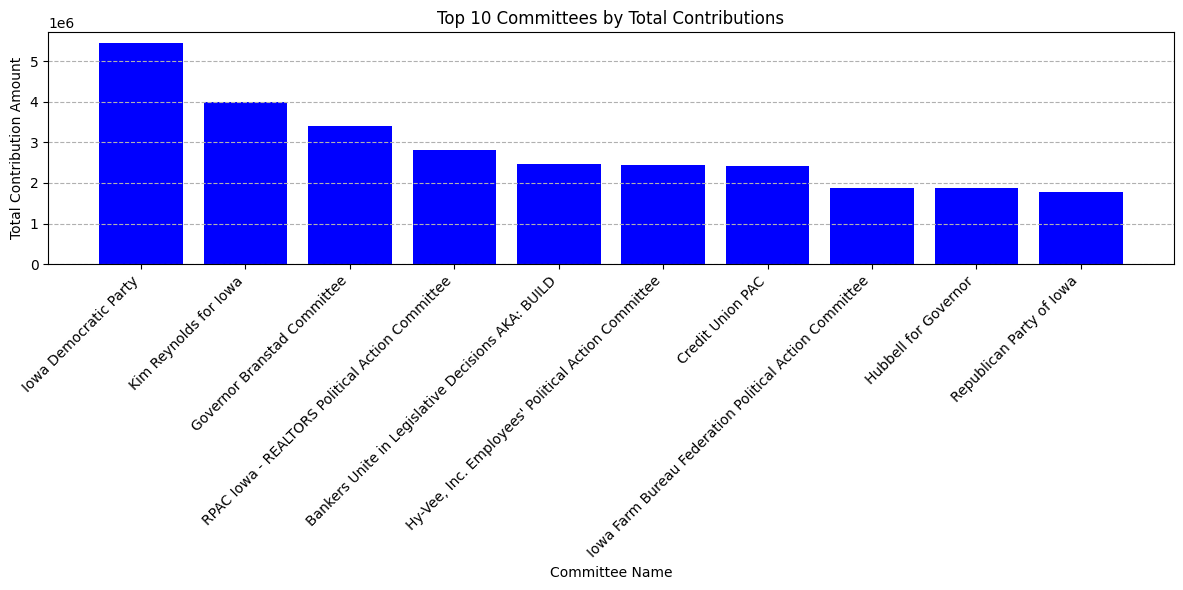

In [400]:
# Total contributions received by each committee
total_contributions = contributions.groupby('Committee Name')['Contribution Amount'].sum().reset_index()

# Top 10 committees by contributions
top_contributors = total_contributions.sort_values(by='Contribution Amount', ascending=False).head(10)
print("Top 10 Committees by Contributions:")
print(top_contributors)

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(top_contributors['Committee Name'], top_contributors['Contribution Amount'], color='blue')
plt.title('Top 10 Committees by Total Contributions')
plt.xlabel('Committee Name')
plt.ylabel('Total Contribution Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Top 10 Committees by Spending:
                                         Committee Name  Expenditure Amount
3402                              Iowa Democratic Party         15581934.21
5444                           Republican Party of Iowa          3241635.44
260          Associated General Contractors of Iowa PAC          2333872.76
1904                                   Credit Union PAC          2234216.78
320   Bankers Unite in Legislative Decisions AKA: BUILD          1878343.74
4068                              Kim Reynolds for Iowa          1727790.56
5325    RPAC Iowa - REALTORS Political Action Committee          1720814.78
2970                        Governor Branstad Committee          1635501.44
3423                                    Iowa Health PAC          1586792.57
3303  Hy-Vee, Inc. Employees' Political Action Commi...          1425764.80


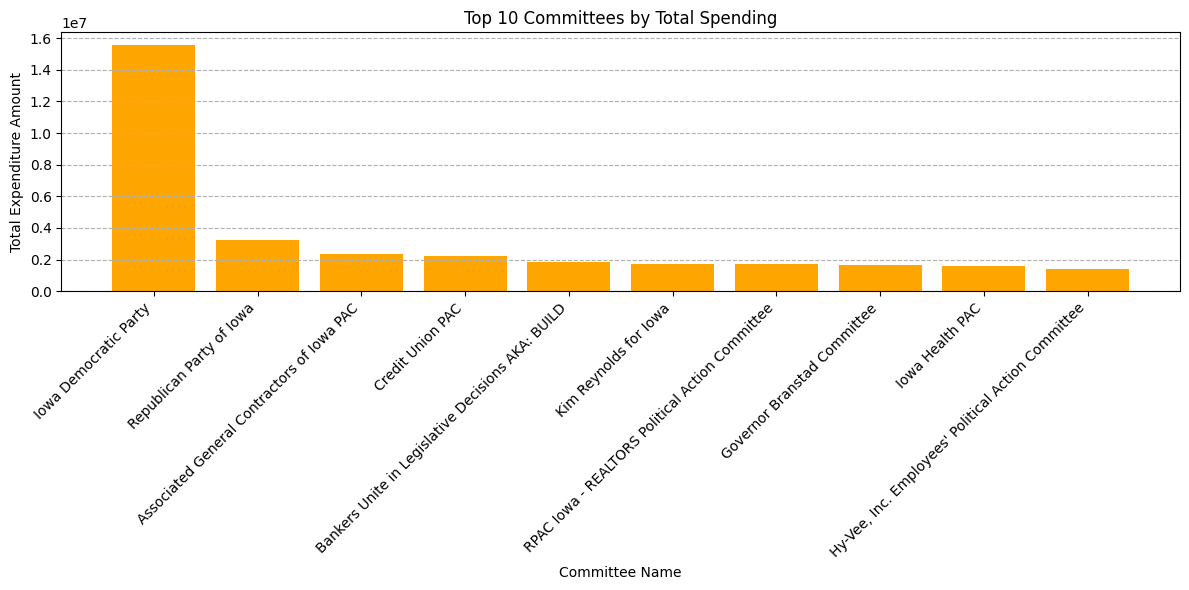

In [401]:
# Spending by each committee
total_spending = expenditures.groupby('Committee Name')['Expenditure Amount'].sum().reset_index()

# Top 10 committees by spending
top_spenders = total_spending.sort_values(by='Expenditure Amount', ascending=False).head(10)
print("Top 10 Committees by Spending:")
print(top_spenders)

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(top_spenders['Committee Name'], top_spenders['Expenditure Amount'], color='orange')
plt.title('Top 10 Committees by Total Spending')
plt.xlabel('Committee Name')
plt.ylabel('Total Expenditure Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Top 10 Committees by Net Balance:
                                         Committee Name  Contribution Amount  \
4301                              Kim Reynolds for Iowa          4003800.225   
3146                        Governor Branstad Committee          3391976.790   
3466                               Hubbell for Governor          1864490.125   
5637    RPAC Iowa - REALTORS Political Action Committee          2817889.635   
3490  Hy-Vee, Inc. Employees' Political Action Commi...          2437382.700   
3600  Iowa Farm Bureau Federation Political Action C...          1880688.255   
2201                                    DeJear for Iowa          1550771.660   
1109                              Citizens for Gronstal          1104045.795   
3356           Heavy Highway Political Action Committee          1696091.230   
6813                                  Upmeyer for House           824413.825   

      Expenditure Amount  Net Balance  
4301          1727790.56  2276009.665  
3146 

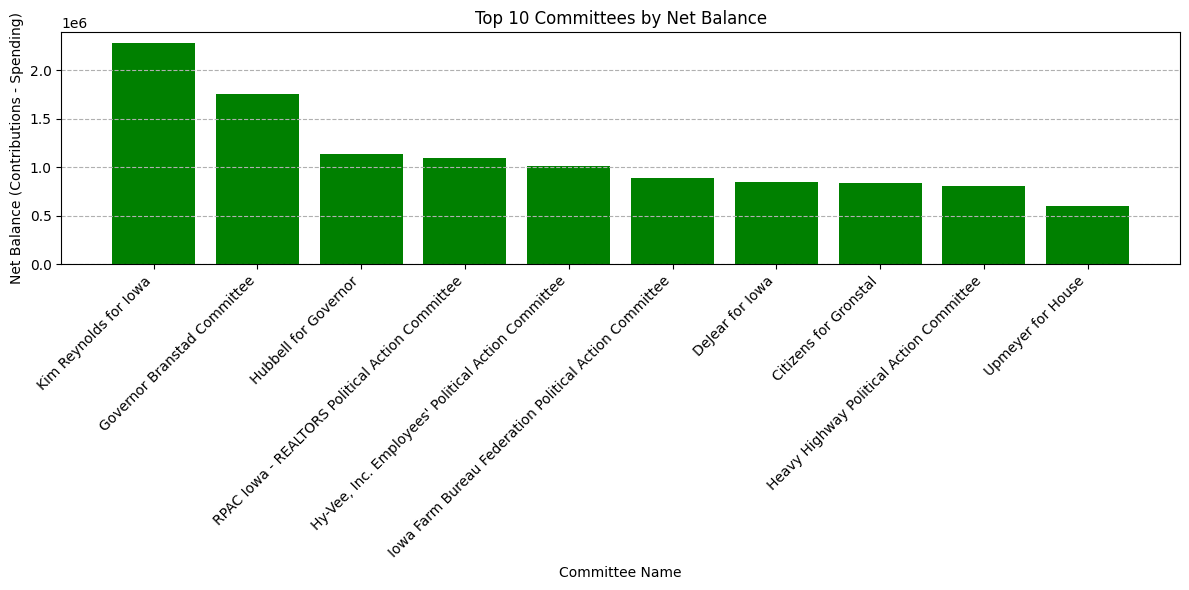

In [402]:
# Merge contributions and spending
contributions_vs_spending = pd.merge(
    total_contributions, total_spending,
    on='Committee Name',
    how='outer'
).fillna(0)

# Calculate net balance (Contributions - Spending)
contributions_vs_spending['Net Balance'] = contributions_vs_spending['Contribution Amount'] - contributions_vs_spending['Expenditure Amount']

# Top 10 committees by net balance
top_net_balances = contributions_vs_spending.sort_values(by='Net Balance', ascending=False).head(10)
print("Top 10 Committees by Net Balance:")
print(top_net_balances)

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(top_net_balances['Committee Name'], top_net_balances['Net Balance'], color='green')
plt.title('Top 10 Committees by Net Balance')
plt.xlabel('Committee Name')
plt.ylabel('Net Balance (Contributions - Spending)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Committee Type Distribution:
Committee Type
State House                                        324
County Candidate - Supervisor                      241
Iowa PAC                                           233
County Central Committee                           197
City Candidate - City Council                      156
School Board Candidate                             116
State Senate                                       112
County Candidate - Sheriff                          88
County Candidate - Auditor                          54
City Candidate - Mayor                              44
Local Ballot Issue                                  29
County Candidate - Attorney                         26
County Candidate - Treasurer                        25
County Candidate - Recorder                         24
County PAC                                           8
City PAC                                             6
Governor                                             4
School Board or Other

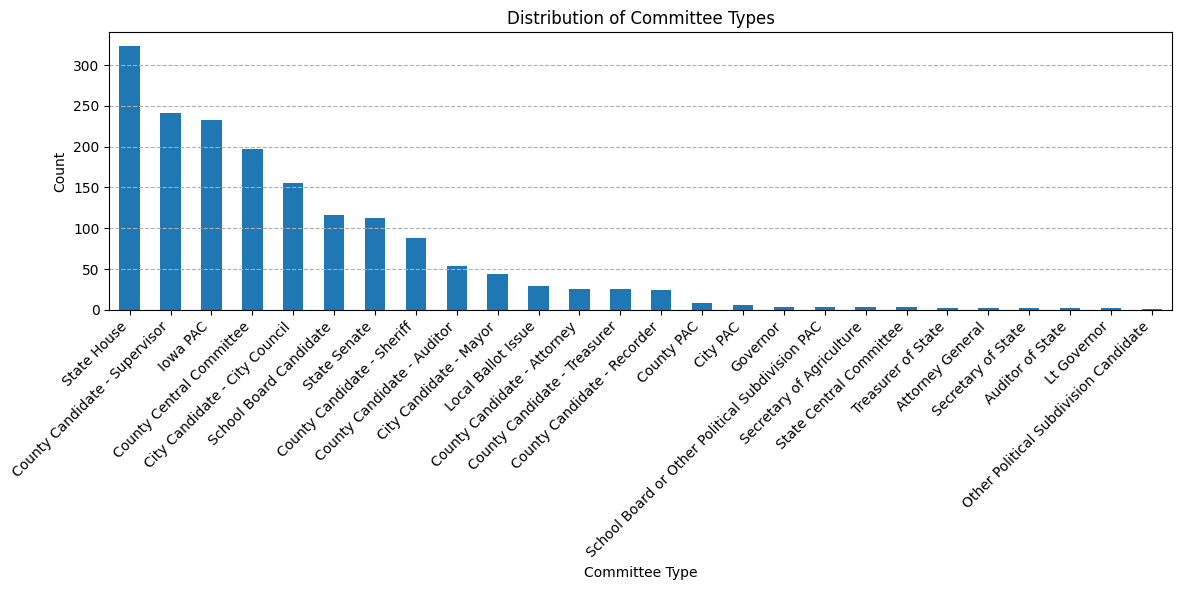

In [403]:
# Count the occurrences of each committee type
committee_type_counts = candidates['Committee Type'].value_counts()

# Display top committee types by count
print("Committee Type Distribution:")
print(committee_type_counts)

# Visualize the distribution of committee types
plt.figure(figsize=(12, 6))
committee_type_counts.plot(kind='bar')
plt.title('Distribution of Committee Types')
plt.xlabel('Committee Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Top 10 Committee Types by Contributions:
                   Committee Type  Contribution Amount  Expenditure Amount  \
14                       Iowa PAC         4.558192e+07         56072307.71   
23                    State House         1.769391e+07         10644974.40   
11       County Central Committee         1.664706e+07         19719731.93   
24                   State Senate         1.053216e+07          5323813.22   
22        State Central Committee         7.224178e+06         18837892.73   
13                       Governor         4.023448e+06          1768442.88   
9   County Candidate - Supervisor         2.366411e+06          2766435.24   
2   City Candidate - City Council         2.153009e+06          1757044.04   
0                Attorney General         1.234825e+06           581161.92   
1                Auditor of State         1.121157e+06           559377.49   

    Net Contributions  
14      -1.049039e+07  
23       7.048932e+06  
11      -3.072674e+06  
24  

<Figure size 1200x600 with 0 Axes>

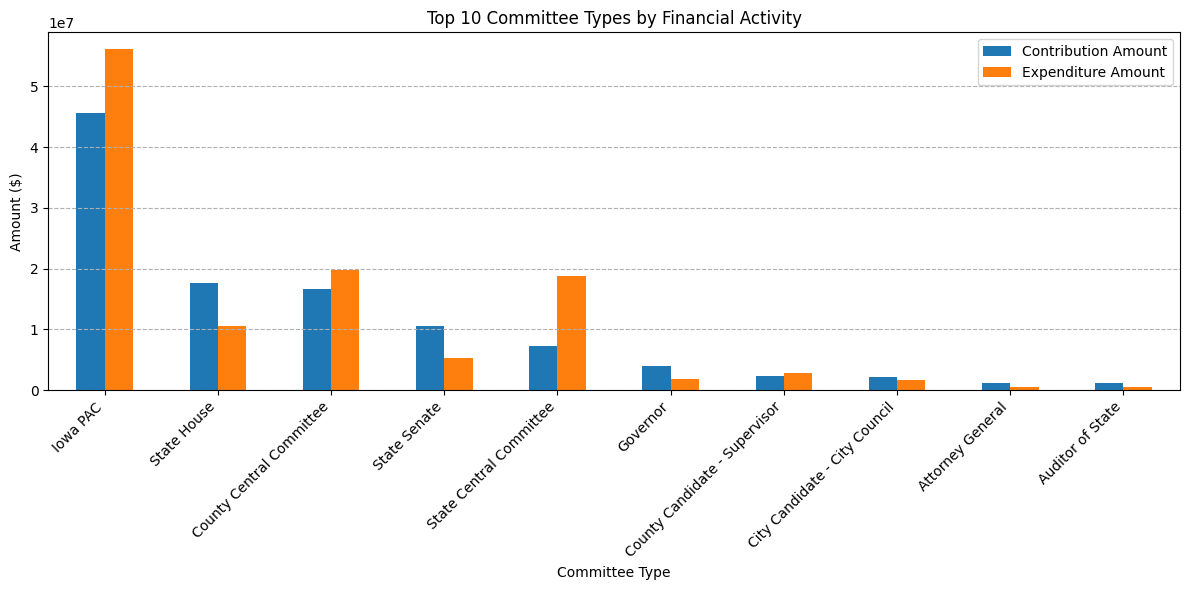

In [404]:
# Contributions grouped by committee number
contributions_by_committee_type = pd.merge(
    contributions.groupby('Committee Name')['Contribution Amount'].sum().reset_index(),
    candidates[['Committee Number', 'Committee Type', 'Committee Name']],
    on='Committee Name',
    how='inner'
).groupby('Committee Type')['Contribution Amount'].sum().reset_index()

# Expenditures grouped by committee number
expenditures_by_committee_type = pd.merge(
    expenditures.groupby('Committee Name')['Expenditure Amount'].sum().reset_index(),
    candidates[['Committee Number', 'Committee Type', 'Committee Name']],
    on='Committee Name',
    how='inner'
).groupby('Committee Type')['Expenditure Amount'].sum().reset_index()

# Merge contributions and expenditures
financial_by_committee_type = pd.merge(
    contributions_by_committee_type,
    expenditures_by_committee_type,
    on='Committee Type',
    how='outer'
).fillna(0)

# Calculate net contributions
financial_by_committee_type['Net Contributions'] = financial_by_committee_type['Contribution Amount'] - financial_by_committee_type['Expenditure Amount']

# Display top 10 committee types by contributions
top_contributors = financial_by_committee_type.sort_values(by='Contribution Amount', ascending=False).head(10)
print("Top 10 Committee Types by Contributions:")
print(top_contributors)

# Visualization
plt.figure(figsize=(12, 6))
top_contributors.set_index('Committee Type')[['Contribution Amount', 'Expenditure Amount']].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Committee Types by Financial Activity')
plt.xlabel('Committee Type')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [407]:
# Group by donor details and count contributions
repeated_donors = contributions.groupby(['First Name', 'Last Name', 'Address - Line 1']).size().reset_index(name='Counts')

# Filter donors who contributed more than once
repeated_donors = repeated_donors[repeated_donors['Counts'] > 1]

# Display top repeated donors
top_repeated_donors = repeated_donors.sort_values(by='Counts', ascending=False).head(10)
print("Top Repeated Donors:")
print(top_repeated_donors)

Top Repeated Donors:
       First Name Last Name                 Address - Line 1  Counts
751439    Unknown   Unknown                       123 street   20913
766644    Unknown   Unknown                          Unknown   14240
761884    Unknown   Unknown            621 East Ninth Street    6444
761182    Unknown   Unknown                 5661 Fleur Drive    5312
758823    Unknown   Unknown          400 E Court Ave Ste 126    3659
753519    Unknown   Unknown                 1775 90th Street    3006
761943    Unknown   Unknown            625 East Court Avenue    2836
751909    Unknown   Unknown                1331 Grand Avenue    2677
762982    Unknown   Unknown  7745 Office Plaza Dr N, Ste 170    2111
750538    Unknown   Unknown            1111 Office Park Road    1993


Top Ballot Issues by Independent Expenditures:
                                    For Ballot Issue  \
7                                            Unknown   
6                                            Unknown   
3                                            Unknown   
4                                            Unknown   
2         Polk County Courthouse Ref Vote 46-3503308   
8                                   vote yes for EMS   
0    #BALLOT50420 - Yes for Dubuque Schools Campaign   
5                                            Unknown   
1  #BALLOT50741 - Education Matters - Support Fai...   

                           Against Ballot Issue        Amount  
7                                       Unknown  4.475121e+06  
6                         Polk County Sales Tax  9.810750e+03  
3  #BALLOT50959 - Our Land Our Water Our Future  8.688263e+03  
4                  Gov't Internet in Fort Dodge  4.208820e+03  
2                                       Unknown  2.500000e+03  
8       

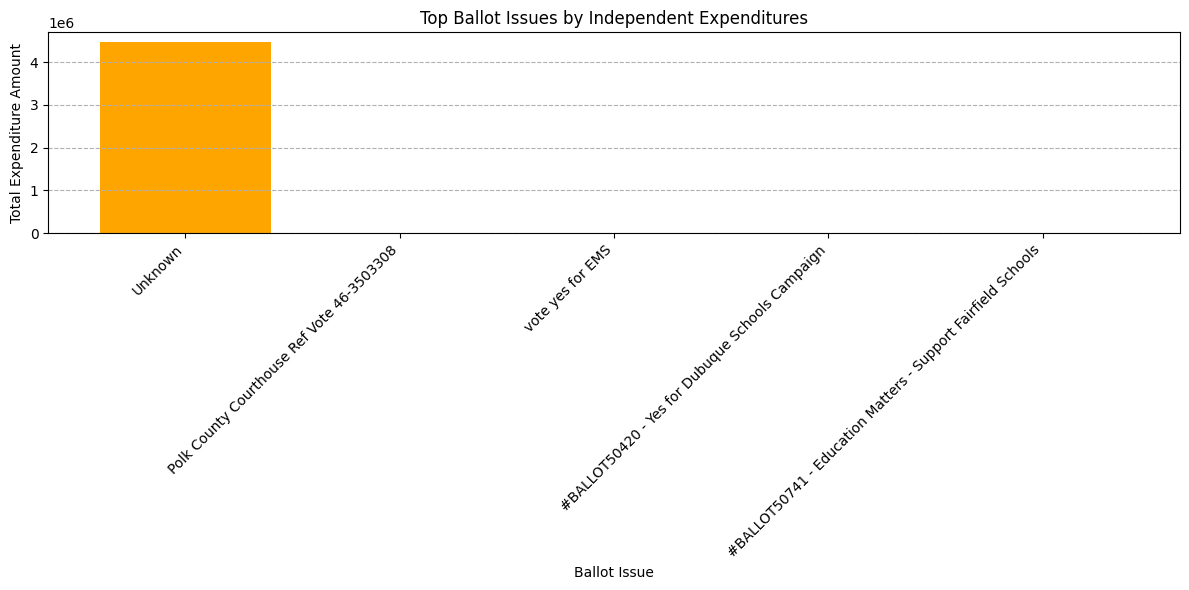

In [408]:
# Group independent expenditures by ballot issue
ballot_expenditures = independent_expenditures.groupby(['For Ballot Issue', 'Against Ballot Issue'])['Amount'].sum().reset_index()

# Display top ballot issues by spending
top_ballot_issues = ballot_expenditures.sort_values(by='Amount', ascending=False).head(10)
print("Top Ballot Issues by Independent Expenditures:")
print(top_ballot_issues)

# Visualize expenditures for ballot issues
plt.figure(figsize=(12, 6))
plt.bar(top_ballot_issues['For Ballot Issue'], top_ballot_issues['Amount'], color='orange')
plt.title('Top Ballot Issues by Independent Expenditures')
plt.xlabel('Ballot Issue')
plt.ylabel('Total Expenditure Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Small vs Large Contributions:
  Donation Type  Contribution Amount
0         Large         1.684781e+08
1         Small         1.604478e+07


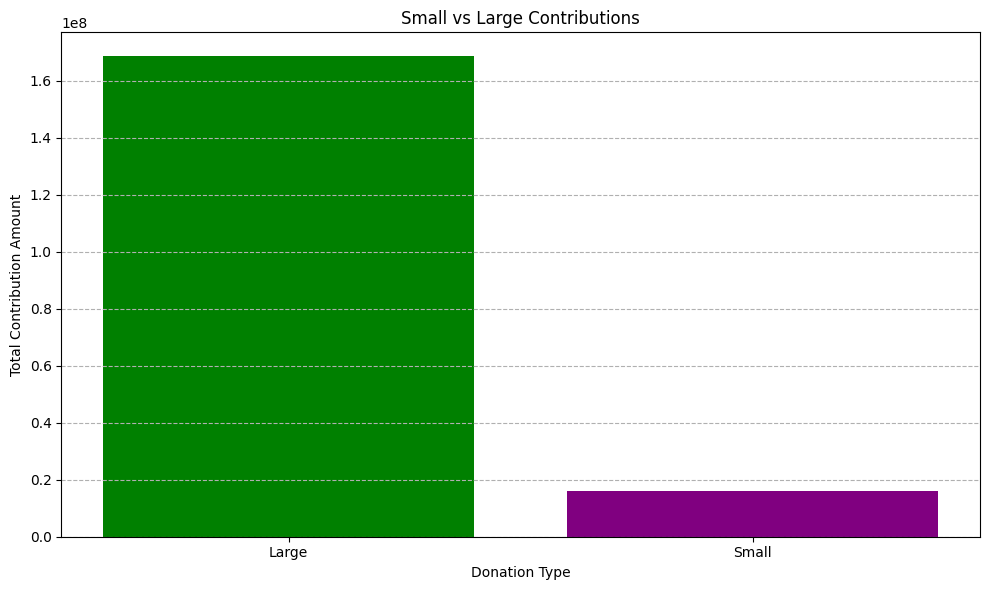

In [409]:
# Categorize contributions as small or large
contributions['Donation Type'] = contributions['Contribution Amount'].apply(lambda x: 'Small' if x <= 25 else 'Large')

# Summarize total amounts by donation type
donation_summary = contributions.groupby('Donation Type')['Contribution Amount'].sum().reset_index()

# Display small vs large contributions
print("Small vs Large Contributions:")
print(donation_summary)

# Visualize small vs large contributions
plt.figure(figsize=(10, 6))
plt.bar(donation_summary['Donation Type'], donation_summary['Contribution Amount'], color=['green', 'purple'])
plt.title('Small vs Large Contributions')
plt.xlabel('Donation Type')
plt.ylabel('Total Contribution Amount')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Top PACs by Spending:
                                         Committee Name  Expenditure Amount
3402                              Iowa Democratic Party         15581934.21
5444                           Republican Party of Iowa          3241635.44
260          Associated General Contractors of Iowa PAC          2333872.76
1904                                   Credit Union PAC          2234216.78
320   Bankers Unite in Legislative Decisions AKA: BUILD          1878343.74
4068                              Kim Reynolds for Iowa          1727790.56
5325    RPAC Iowa - REALTORS Political Action Committee          1720814.78
2970                        Governor Branstad Committee          1635501.44
3423                                    Iowa Health PAC          1586792.57
3303  Hy-Vee, Inc. Employees' Political Action Commi...          1425764.80


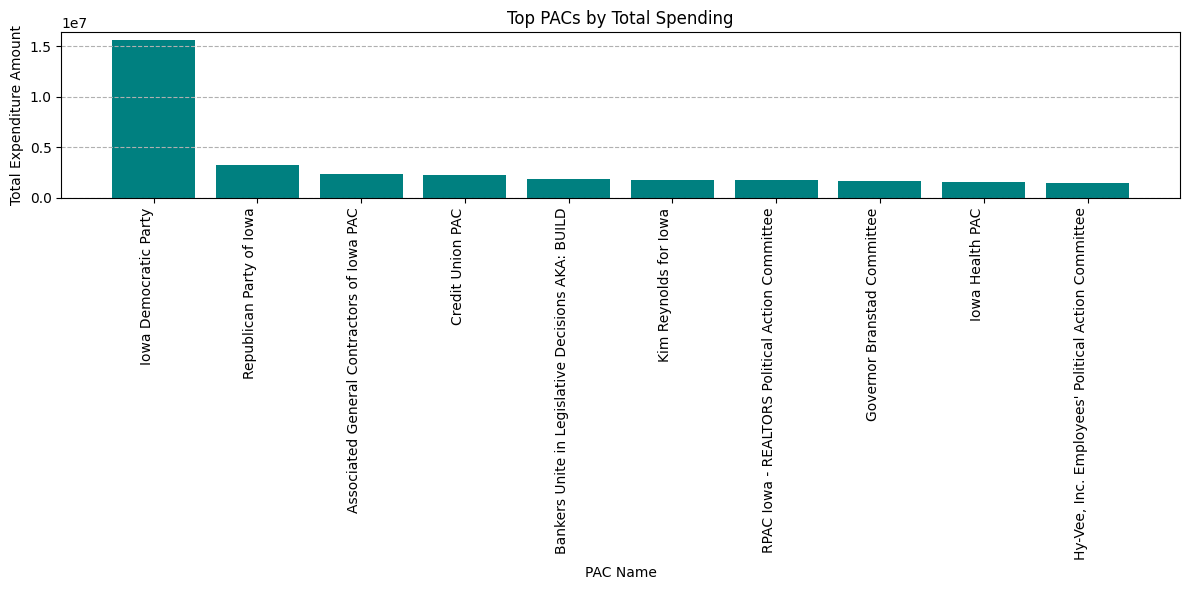

In [410]:
# Group PAC expenditures by transaction type
pac_spending = expenditures.groupby(['Committee Name', 'Transaction Type'])['Expenditure Amount'].sum().reset_index()

# Identify top PACs by total spending
top_pacs = pac_spending.groupby('Committee Name')['Expenditure Amount'].sum().reset_index().nlargest(10, 'Expenditure Amount')

# Display top PACs
print("Top PACs by Spending:")
print(top_pacs)

# Visualize PAC spending
plt.figure(figsize=(12, 6))
plt.bar(top_pacs['Committee Name'], top_pacs['Expenditure Amount'], color='teal')
plt.title('Top PACs by Total Spending')
plt.xlabel('PAC Name')
plt.ylabel('Total Expenditure Amount')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()